#**Predicción de Morosos con Tarjeta de Crédito(Credit Card defaulter)**

---




<img src="https://images.unsplash.com/photo-1556742031-c6961e8560b0?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=464&q=80" height="1000" width="1000">



#####CoderHouse
#####Realizado por: Eduardo Cament Oviedo
#####Comisión curso: 52290
#####Profesor: Arturo Tapia Sanchez
#####Tutor: Karen Tamarin

##1. Resumen

El análisis que se lleva acabo en las próximas celdas de este Notebook está basado en un "*DataSet*" desde "*Kaggle*", página ideal para quienes desean estudiar e integrarse en el mundo del "*Data Science*". Se selecciona este proyecto por ser de gran interés cuando se trata de analizar temas realizados con las finazas bancarias y de sus usuarios, inspirado en el análisis de la realidad financiera ocrrida en Taiwan en 2006, cuando los entes bancarios con miras a aumentar la participación en el mercado por parte de los usuarios, toman la decisión de aumentar de manera no muy controlada la adjudicación de tarjetas de créditos a sus clientes sin realizar un gran análisis respecto a su capacidad de pago. Esto provoca una crisis al aumentar la cantidad de tarjetas habientes con alta morosidad o deudas acumuladas, deteriorando así la confianza entre entes financieros o bancarios y sus usuarios.
El análsis que se realiza durante este proyecto resulta de gran interes tanto de parte de los entes bancarios como de sus clientes, puesto que busca en función de datos obtenidos durante 2006 sobre clientes tarjeta habientes, predecir si nuevos potenciales usuarios podrán cumplir con sus obligaciones financieras.
Los datos obtenidos se basan en el comportamiento de pagos de clientes en Taiwán basado en un histórico de 6 meses registrado en el DataSet que se ha descargado previamente y con el cual se pretende trabajar.
Este tipo de análisis y predición podría perfectamente extrapolarse y aplicar en cualquier país en función de datos recabados de sus clientes para así determinar que probalidades existen que nuevos aplicantes en función de sus datos demográficos, y comportamientos de pagos puedadan ser seleccioanados  disminuyendo así las morosidades, y los costos y perdidas asociados en los que se incurre cuando se pierde la confianza con los trajetas habientes.

Fuentes de datos:
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/download?datasetVersionNumber=1

##2. Librerías Pandas y Ciencias de Datos

###2.1. Conexión a Google Drive

In [2]:
from google.colab import drive
import os
drive.mount('/content/Gdrive')
%cd '/content/Gdrive/MyDrive/Coderhouse/Data_science/Proyecto'
os.getcwd()

Mounted at /content/Gdrive
/content/Gdrive/MyDrive/Coderhouse/Data_science/Proyecto


'/content/Gdrive/MyDrive/Coderhouse/Data_science/Proyecto'

###2.3. Instalación de librerías útiles

In [3]:
# Esta librería permita crear libros Excel
!pip install openpyxl --quiet

In [4]:
# Liberería Predictive Power Score, permite tabular correlaciones entre variables Predictoras y Objetivo
# Es una alternativa al uso de la matriz de correlación (Tabla.corr())
%pip install ppscore --quiet

  Preparing metadata (setup.py) ... done


In [5]:
#Instalación de Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  --quiet

     | 22.6 MB 28.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.0 MB/s eta 0:00:00


###2.4. Importación de librerías

In [6]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import openpyxl
import ppscore as pps
import pandas_profiling
import warnings
pd.options.mode.chained_assignment = None  # default='warn'


<ipython-input-6-d54cffc3a918>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [7]:
# Se cargan las librerias para los modelos
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, classification_report

In [8]:
# Librerias para gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 3. DataSet "Credit Card Defaulter"
###3.1. Carga del DataSet


In [9]:
# Carga de DataSet
credit_default_df = pd.read_excel("DataSets/default of credit card clients.xls")
credit_default_df

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
1         -1     -1  ...          0          0          0         0       689   
2          0      0  ...       3272       3455       3261         0      1000   
3          0      0  ...      14331      14948      15549      1518      1500   
4          0      0  ...      28314      28959      29547      2000      2019   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29996      0      0  ...      88004      31237      15980      8500     20000   
29997     -1     -1  ...       8979       5190          0      1837      3526   
29998      2     -1  ...      20878      20582      19357         0         0   
29999      0      0  ...      52774      11855      48944     85900      3409   
30000      0      0  ...      36535      32428      15313      2078      1800   

            X20       X21       X22       X23                           Y  
0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30001 rows x 25 columns]

###3.2. Significado de las Variables en la Tabla:
#### La tabla a analizar posee 24 columnas que incluyen información demográfica (AGE, SEX, MARRIAGE), Monto de crédito(LIMIT_BAL), pagos del mes anterior desde abril a septiembre de 2005(PAY_AMT1 - PAY_AMT6), estado de reembolso en dichos meses(columnas PAY_0, PAY_2 a PAY_6). Montos de Estados de Cuenta correspondientes a los meses de Abril a Septiembre 2005(columnas  BILL_AMT6 a BILL_AMT1). A continuación se lista y describen cada una de las variables:

####1. LIMIT_BAL: Monto de Crédito
####2. AGE: Edad del cliente
####3. SEX: Sexo
####4. MARRIAGE: Estado Civil
####5. EDUCATION: Nivel Educativo
####6. PAY_0: Estado de Pago Septiembre 2005
####7. PAY_2: Estado de Pago Agosto 2005
####8. PAY_3: Estado de Pago Julio 2005
####9. PAY_4: Estado de Pago Junio 2005
####10. PAY_5: Estado de Pago Mayo 2005
####11. PAY_6: Estado de Pago Abril 2005
####12. BILL_AMT1: Estado de Cuenta Septiembre 2005
####13. BILL_AMT2: Estado de Cuenta Agosto 2005
####14. BILL_AMT3: Estado de Cuenta Julio 2005
####15. BILL_AMT4: Estado de Cuenta Junio 2005
####16. BILL_AMT5: Estado de Cuenta Mayo 2005
####17. BILL_AMT6: Estado de Cuenta Abril 2005
####18. PAY_AMT1: Pago Septiembre 2005
####19. PAY_AMT2: Pago Agosto 2005
####20. PAY_AMT3: Pago Julio 2005
####21. PAY_AMT4: Pago Junio 2005
####22. PAY_AMT5: Pago Mayo 2005
####23. PAY_AMT6: Pago Abril 2005
####24. default.payment.next.month: Impago o Moroso("1" si el cliente no pagó, 0 si el Cliente pagó)


##3.3. Descripción de tipos de datos de las Variables :



###3.3.1.   Variables Numéricas

####- LIMIT_BAL: En Dolares Taiwanés
####- EDAD: En años
####- BILL_AMT1 - BILL_AMT6: En Dolares Taiwanés
####- PAY_AMT1 - PAY_AMT6: En Dolares Taiwanés





###3.3.2.   Variables Categóricas

####- EDUCATION: 1=Postgrado, 2=universidad, 3=Secundaria, 4=others, 5=unknown, 6=unknown
####- SEX: 1=M, 0=F
####- MARRIAGE: 1=Casado, 2=Soltero, 3=otros
####- PAY0 - PAY6: -1=Pago oprtuno, 1=Pago con atraso de 1 mes, 2=Pago con atraso de 2 meses, 3=Pago con atraso de 3 mes ... 9=Pago con atraso de 9 meses


In [10]:
# Se crea nuevo DataSet para desplazar los nombres de las columnas
# hacia la cabecera de la tabla, luego se Listan las primeras 10 filas y 15 columnas
Data = credit_default_df.values[1:, :]
credit_card_default = pd.DataFrame(data=Data, columns=credit_default_df.iloc[0, :])
credit_card_default.iloc[0:10, :15]

0  ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
0   1     20000   2         2        1  24     2     2    -1    -1    -2   
1   2    120000   2         2        2  26    -1     2     0     0     0   
2   3     90000   2         2        2  34     0     0     0     0     0   
3   4     50000   2         2        1  37     0     0     0     0     0   
4   5     50000   1         2        1  57    -1     0    -1     0     0   
5   6     50000   1         1        2  37     0     0     0     0     0   
6   7    500000   1         1        2  29     0     0     0     0     0   
7   8    100000   2         2        2  23     0    -1    -1     0     0   
8   9    140000   2         3        1  28     0     0     2     0     0   
9  10     20000   1         3        2  35    -2    -2    -2    -2    -1   

0 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3  
0    -2      3913      3102       689  
1     2      2682      1725      2682  
2     0     29239     14027     13559  
3     0     46990     48233     49291  
4     0      8617      5670     35835  
5     0     64400     57069     57608  
6     0    367965    412023    445007  
7    -1     11876       380       601  
8     0     11285     14096     12108  
9    -1         0         0         0

## 4. Manipulación de los datos mediante Pandas


###4.1. Manipulación básica de datos

In [11]:
# Descripción del dataSet
credit_card_default.describe()
credit_card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

Como se observa en la descripción de variables los tipos de datos son transformados mediante Pandas al tipo texto por defecto.

In [12]:
# Se guarda el DataSet ya con el formato de cabecera correcto y sin los índices
credit_card_default.to_excel("DataSets/default of credit card clients update.xlsx", index=False)

In [13]:
# Se vuelve a cargar el  DataSet para convertir todos los datos a tipo numéricos para ser utilizados en los modelos mas adelante
credit_card_default = pd.read_excel("DataSets/default of credit card clients update.xlsx", dtype='int64')
credit_card_default

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [14]:
#Descripción estadística para el DataSet
credit_card_default.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [15]:
#Se verifica los tipos de datos numéricos de todas las variables
credit_card_default.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [16]:
# Dimensión de la tabla o Dataset
credit_card_default.shape

(30000, 25)

In [17]:
# Se verifica además que los datos son de tipo entero, que no existan valore nulos
credit_card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###4.2. Reemplazos de valores en variables categóricaas

In [18]:
#la variable "EDUCATION" es el tipo categórica, los valorea 0, 5 y 6 no están documentados
credit_card_default['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [19]:
#Los estados desconocidos pueden ser incluidos dentro de la categoría "Otro"(4), por lo que pueden ser
#reemplazados por el valor 4(Otro)
credit_card_default["EDUCATION"] = credit_card_default["EDUCATION"].replace(to_replace=[0, 5, 6], value= 4)
credit_card_default['EDUCATION'].value_counts().sort_index()

1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

De los tarjeta habientesla mayoría poseen formación universitaria

In [20]:
# Explorar los valores categóricos de "MARRIAGE"
credit_card_default['MARRIAGE'].unique()

array([1, 2, 3, 0])

1 = Casado(a), 2 = Soltero(a), 3 = Otros, El valor "0" puede reemplazarse por el "3"

In [21]:
credit_card_default["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)
credit_card_default["MARRIAGE"].value_counts().sort_index()

1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64

Existen más solteros que casados

Se debe analizar los valores de las variables categóricas PAY_0, PAY_2,PAY_6

In [22]:
#Se imprimen los "Estados" para cada columna
print("Estatus trajeta habiente en Septiembre 2005: ", credit_card_default["PAY_0"].unique())
print("Estatus trajeta habiente en Agosto 2005: ", credit_card_default["PAY_2"].unique())
print("Estatus trajeta habiente en Julio 2005: ", credit_card_default["PAY_3"].unique())
print("Estatus trajeta habiente en Junio 2005: ", credit_card_default["PAY_4"].unique())
print("Estatus trajeta habiente en Mayo 2005: ", credit_card_default["PAY_5"].unique())
print("Estatus trajeta habiente en Abril 2005: ", credit_card_default["PAY_6"].unique())

Estatus trajeta habiente en Septiembre 2005:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
Estatus trajeta habiente en Agosto 2005:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
Estatus trajeta habiente en Julio 2005:  [-1  0  2 -2  3  4  6  7  1  5  8]
Estatus trajeta habiente en Junio 2005:  [-1  0 -2  2  3  4  5  7  6  1  8]
Estatus trajeta habiente en Mayo 2005:  [-2  0 -1  2  3  5  4  7  8  6]
Estatus trajeta habiente en Abril 2005:  [-2  2  0 -1  3  6  4  7  8  5]


De 1 a 8 significa que el tarjeta habiente posee la cantidad de meses en atraso según se indica, -1 es cuando está al día con sus pagos, se puede decir que los valores 0, y cualquier valor negativo(-1, -2 en este caso) indican que el cliente está al día, por tanto la sugerencia sería reemplazar los valores negativos por el "0".

In [23]:
# Reemplazo de valores en las columnas indicadas
credit_card_default[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = credit_card_default[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace(to_replace=[-1, -2], value=0)

In [24]:
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  print("Status ", col, end=" - ")
  print(credit_card_default[col].unique())

Status  PAY_0 - [2 0 1 3 4 8 7 5 6]
Status  PAY_2 - [2 0 3 5 7 4 1 6 8]
Status  PAY_3 - [0 2 3 4 6 7 1 5 8]
Status  PAY_4 - [0 2 3 4 5 7 6 1 8]
Status  PAY_5 - [0 2 3 5 4 7 8 6]
Status  PAY_6 - [0 2 3 6 4 7 8 5]


Los reemplazos son coerrectos. Por otro lado para evitar la dispersión en la columna "AGE" se puede sugerir acotar la edades hasta los 60 años, por tanto todas la edades mayores a 60 se reemplazarán como se describe en la siguiente celda.

In [25]:
edades_mayor_60 = credit_card_default[credit_card_default["AGE"] > 60]["AGE"].tolist()

In [26]:
# Se reemplazan las edades mayores de 60 por "60"
credit_card_default["AGE"].replace(to_replace=edades_mayor_60, value=60, inplace=True)
credit_card_default["AGE"].value_counts().sort_index()

21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60     339
Name: AGE, dtype: int64

Edades correctamente acotadas hasta los 60 años

#  5. Exploración Gráfica mediante Matplotlib


In [27]:
# Se realizan operaciones con pandas para obtener datos que permitan
# relacionar los montos de créditos por segmento o rango de edades
# y sí se pueda realizar un gráfico tipo Barra
# Primero de obtiene un nuevo DF con las columnas indicadas abajo
df_edades = credit_card_default[['LIMIT_BAL', 'AGE']]

# Mediante filtros se obtienen nuevas columnas para los rangos de edades y la suma
# de los montos de créditos totales para cada rango de edades
edades_r1 = df_edades[(df_edades.loc[:, 'AGE']>=20) & (df_edades.loc[:, 'AGE'] < 30)]
edades_r1.loc[:,'Rango_edad'] = '20 - 29'
edades_r1.loc[:, 'Sum_credito'] = edades_r1.loc[:, 'LIMIT_BAL'].sum()
edades_r1

edades_r2 = df_edades[(df_edades.loc[:, 'AGE']>=30) & (df_edades.loc[:, 'AGE'] < 40)]
edades_r2.loc[:,'Rango_edad'] = '30 - 39'
edades_r2.loc[:, 'Sum_credito'] = edades_r2.loc[:, 'LIMIT_BAL'].sum()
edades_r2

edades_r3 = df_edades[(df_edades.loc[:, 'AGE']>=40) & (df_edades.loc[:, 'AGE'] < 50)]
edades_r3.loc[:,'Rango_edad'] = '40 - 49'
edades_r3.loc[:, 'Sum_credito'] = edades_r3.loc[:, 'LIMIT_BAL'].sum()
edades_r3

edades_r4 = df_edades[(df_edades.loc[:, 'AGE']>=50) & (df_edades.loc[:, 'AGE'] < 60)]
edades_r4.loc[:,'Rango_edad'] = '50 - 59'
edades_r4.loc[:, 'Sum_credito'] = edades_r4.loc[:, 'LIMIT_BAL'].sum()
edades_r4

edades_r5 = df_edades[df_edades['AGE']>=60]
edades_r5.loc[:,'Rango_edad'] = 'Mayores de 60'
edades_r5.loc[:, 'Sum_credito'] = edades_r5.loc[:, 'LIMIT_BAL'].sum()
edades_r5


# Se realiza concat para unir los diferentes subconsultas realizadas arriba

edades_concat = pd.concat([edades_r1, edades_r2, edades_r3, edades_r3, edades_r4, edades_r5])
edades_concat.tail(20)

# Se obtienen los arrays para poder realizar la gráfica tipo barra
Rango_edad = edades_concat['Rango_edad'].unique()
Sum_credito = edades_concat['Sum_credito'].unique()

Rango_edad
Sum_credito

array([1194640000, 2213900000, 1168599680,  383710000,   63680000])

In [28]:
# Operaciones pandas para preparar la visualización tipo barra Monto de crédito
# en Dollares NT vs Nivel educativo
# 1=graduate school, 2=university, 3=high school, 4=others
df_educacion = credit_card_default[['LIMIT_BAL', 'EDUCATION']]

df_educacion_n1 = df_educacion[df_educacion['EDUCATION'] == 1]
df_educacion_n1.loc[:, 'Nivel'] = 'Postgrado'
df_educacion_n1.loc[:, 'Sum_credito'] = df_educacion_n1.LIMIT_BAL.sum()
df_educacion_n1

df_educacion_n2 = df_educacion[df_educacion['EDUCATION'] == 2]
df_educacion_n2.loc[:, 'Nivel'] = 'Universitario'
df_educacion_n2.loc[:, 'Sum_credito'] = df_educacion_n2.LIMIT_BAL.sum()
df_educacion_n2

df_educacion_n3 = df_educacion[df_educacion['EDUCATION'] == 3]
df_educacion_n3.loc[:, 'Nivel'] = 'Secundaria'
df_educacion_n3.loc[:, 'Sum_credito'] = df_educacion_n3.LIMIT_BAL.sum()
df_educacion_n3

df_educacion_n4 = df_educacion[df_educacion['EDUCATION'] == 4]
df_educacion_n4.loc[:, 'Nivel'] = 'Otro'
df_educacion_n4.loc[:, 'Sum_credito'] = df_educacion_n4.LIMIT_BAL.sum()
df_educacion_n4

educacion_concat = pd.concat([df_educacion_n1, df_educacion_n2, df_educacion_n3, df_educacion_n4])
educacion_concat

Nivel = educacion_concat.Nivel.unique()
Nivel

Sum_credito_n = educacion_concat.Sum_credito.unique()
Sum_credito_n

array([2254140000, 2063286000,  622247680,   84856000])

In [29]:
# Se configura estilo de gráficos
plt.style.use('seaborn')

<ipython-input-29-202220752ff1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Educación')

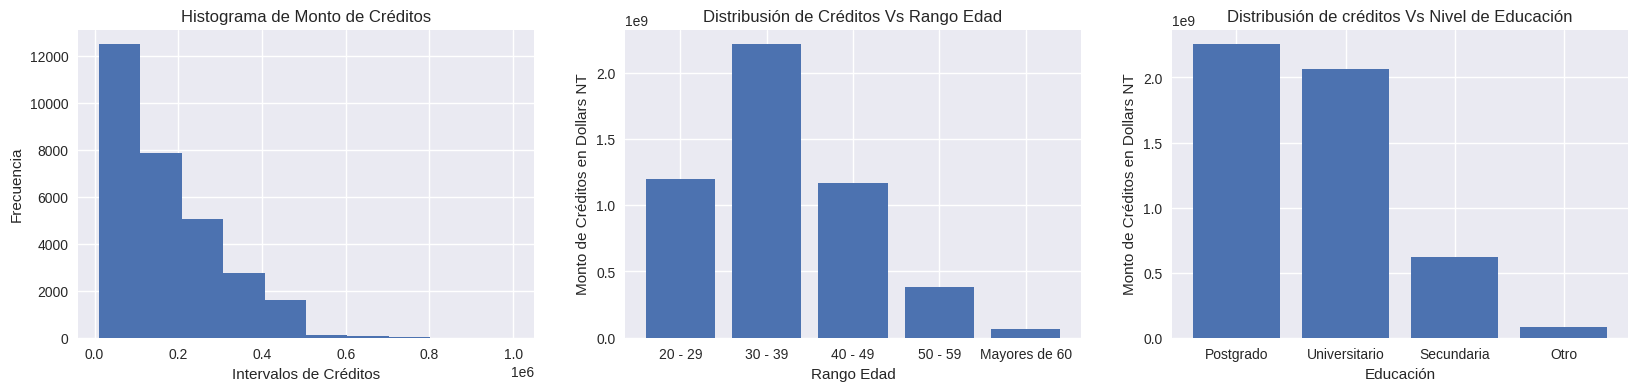

In [30]:
# Se realiza un Histogtrama para visualizar la distribución de los montos de créditos
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax[0].hist(credit_card_default['LIMIT_BAL'])
ax[0].set_title('Histograma de Monto de Créditos')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Intervalos de Créditos')

# Aquí se utilzan las series obtenidas en la celda anterior para graficar (Tipo barra)
# cómo varían los montos de créditos por rango de edades
ax[1].bar(Rango_edad, Sum_credito)
ax[1].set_title('Distribusión de Créditos Vs Rango Edad')
ax[1].set_ylabel('Monto de Créditos en Dollars NT')
ax[1].set_xlabel('Rango Edad')

ax[2].bar(Nivel, Sum_credito_n)
ax[2].set_title('Distribusión de créditos Vs Nivel de Educación')
ax[2].set_ylabel('Monto de Créditos en Dollars NT')
ax[2].set_xlabel('Educación')

## 6. Exploración gráfica con Seabon

In [31]:
# Se configura un tema
sns.set_theme()

In [32]:
# Reemplazar los enteros de la columna "MARRIAGE": 1, 2, 3 por: Casado, Soltero, Otro
credit_card_default_2 = credit_card_default.replace(
    {
        'MARRIAGE': {
            1: "Casado",
            2: "Soltero",
            3: "Otro"}
        })

credit_card_default_2["MARRIAGE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: MARRIAGE
Non-Null Count  Dtype 
--------------  ----- 
30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


In [33]:
credit_card_default_2["MARRIAGE"].value_counts()

Soltero    15964
Casado     13659
Otro         377
Name: MARRIAGE, dtype: int64

El campo "MARRIAGE" queda en formato texto

Text(0, 0.5, 'Frecuencia')

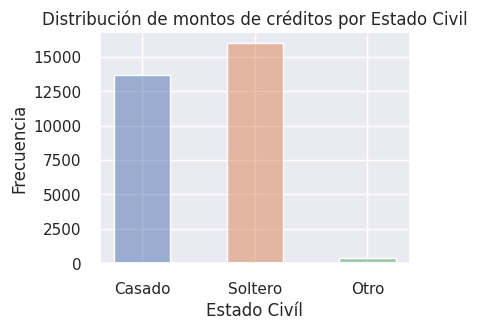

In [34]:
# Se grafica Histograma para la distribución de Monto de créditos
# por Estado Civil(Columna "MARRIAGE")

f, axs = plt.subplots( figsize=(4, 3))
sns.histplot(data=credit_card_default_2, x="MARRIAGE", hue="MARRIAGE", shrink=0.5, legend=False)
axs.set_title('Distribución de montos de créditos por Estado Civil')
axs.set_xlabel('Estado Civíl')
axs.set_ylabel('Frecuencia')
#f.tight_layout()

#sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1]); f.tight_layout()


Los Solteros tienen mayor acceso a los créditos, posiblemente poseen mayor capacidad para endeudarse y estar al día en sus pagos

In [35]:
# Se realizan operaciones Pandas para acondcionar los datos antes de deaplegar
# un Histograma para el comportamiento de pago de los clientes del banco
# Se realiza un unpivot mediante el metodo df.melt sobre las columnas:
# PAY_0,PAY_2, PAY_3, PAY_4, PAY_5, PAY_6


credit_card_default_2 = credit_card_default
credit_card_default_3 = pd.melt(credit_card_default, id_vars='ID',
                        value_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
                        ignore_index=True)

credit_card_default_3.rename(columns={'variable':'Estado_pago'}, inplace=True)
credit_card_default_3
#credit_card_default_2.PAY_0.unique()
# Se evidencia que existen estado: 0, -2 los cuales no están documentados, había
# que investigar, se podría pensar que si -1 corresponde a un cliente que está al día
# lo mas probable es que 0 y cualquier valor negativo correspondan al mismo estado(Pago al día)

ID Estado_pago  value
0           1       PAY_0      2
1           2       PAY_0      0
2           3       PAY_0      0
3           4       PAY_0      0
4           5       PAY_0      0
...       ...         ...    ...
179995  29996       PAY_6      0
179996  29997       PAY_6      0
179997  29998       PAY_6      0
179998  29999       PAY_6      0
179999  30000       PAY_6      0

[180000 rows x 3 columns]

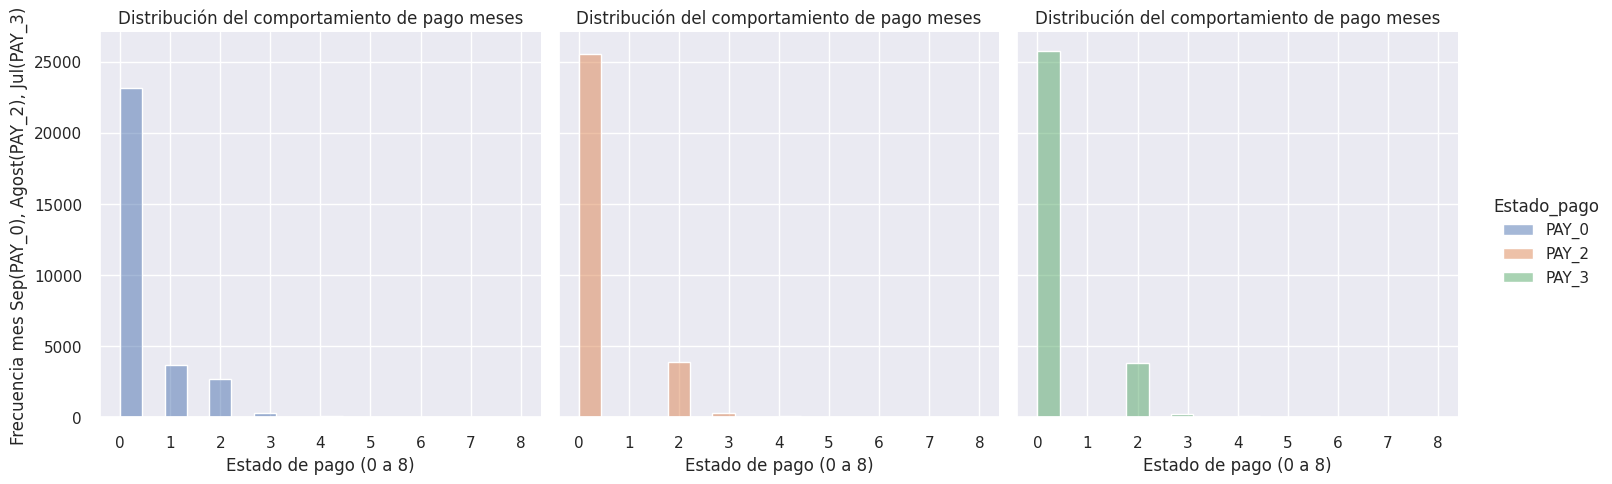

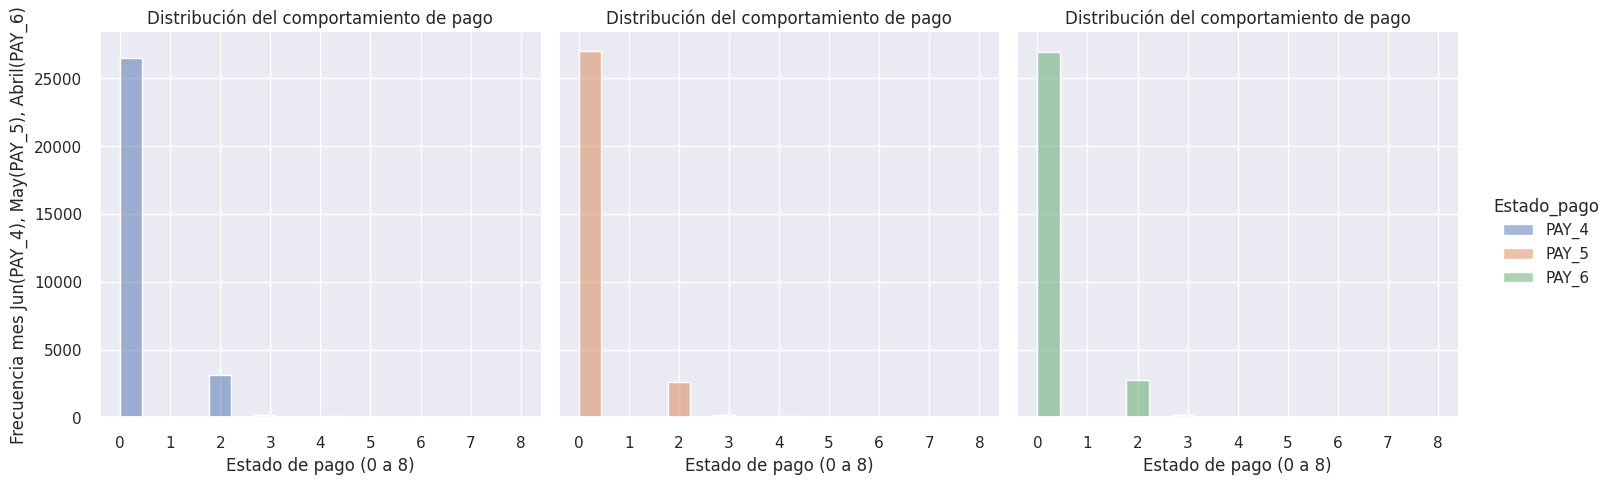

In [35]:
# Se realiza la gráfica tipo Histograma para el comportamiento de pago (PAY_0-PAY_6)
# Mediante el paramétro col en seaborn se separan las distribuciones
# para cada mes de pago.

# Se filtra para obtener nuevo dataframe con grupos de Estado de pago
Condicion_1 = credit_card_default_3.Estado_pago.isin(['PAY_0', 'PAY_2', 'PAY_3'])
Condicion_2 = credit_card_default_3.Estado_pago.isin(['PAY_4', 'PAY_5', 'PAY_6'])
ax1 = sns.displot(data=credit_card_default_3[Condicion_1], x="value", hue='Estado_pago', shrink=1.0, col='Estado_pago')
ax2 = sns.displot(data=credit_card_default_3[Condicion_2], x="value", hue='Estado_pago', shrink=1.0, col='Estado_pago')
ax1.set(xlabel='Estado de pago (0 a 8)', ylabel='Frecuencia mes Sep(PAY_0), Agost(PAY_2), Jul(PAY_3)', title='Distribución del comportamiento de pago meses')
ax2.set(xlabel='Estado de pago (0 a 8)', ylabel='Frecuencia mes Jun(PAY_4), May(PAY_5), Abril(PAY_6)', title='Distribución del comportamiento de pago')

Se observa que se repite en todos los meses un atraso de pago de 2 meses de alrededor de 2.500 clientes, y justo 1 mes antes (Septiembre) se suman atrasos de 1 y 2 meses.

In [38]:
# Se realiza grafico de los Estados de cuenta en los meses Abril a Septiembre 2005
# Primero se realiza un unpivot con el método melt
credit_card_default_4 = pd.melt(credit_card_default, id_vars='ID',
                        value_vars=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], ignore_index=False)
credit_card_default_4.rename(columns={'variable':'Estado_de_cuenta'}, inplace=True)
credit_card_default_4.sort_values(by='ID')

ID Estado_de_cuenta  value
0          1        BILL_AMT1   3913
0          1        BILL_AMT3    689
0          1        BILL_AMT6      0
0          1        BILL_AMT5      0
0          1        BILL_AMT4      0
...      ...              ...    ...
29999  30000        BILL_AMT4  36535
29999  30000        BILL_AMT2  48905
29999  30000        BILL_AMT1  47929
29999  30000        BILL_AMT5  32428
29999  30000        BILL_AMT6  15313

[180000 rows x 3 columns]

[Text(0.5, 0, 'Estados de cuenta para los meses Abril(BILL_AMT6 a Sep(BILL_AMT1)'),
 Text(0, 0.5, 'Valor promedio'),
 Text(0.5, 1.0, 'Suma promedio de Estados de Cuenta meses Abr - Sep')]

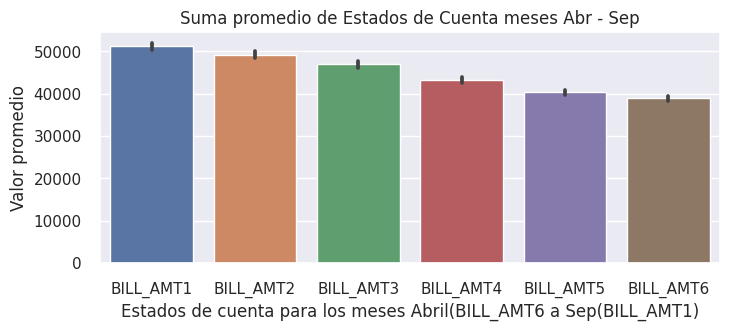

In [37]:
# Se despliega el gráfico tipo barra con el df obtenido
f, axs = plt.subplots( figsize=(8, 3))
ax3 = sns.barplot(data=credit_card_default_4, y='value', x='Estado_de_cuenta', estimator=np.mean)
ax3.set(xlabel='Estados de cuenta para los meses Abril(BILL_AMT6 a Sep(BILL_AMT1)', ylabel='Valor promedio', title='Suma promedio de Estados de Cuenta meses Abr - Sep')

Aún cuando 1 mes antes(septiembre) se observa que el valor promedio de Estados de Cuentas es mayor que los demas meses, no necesariamente implica que el deudor o deudores tengan mas problemas en pagar al mes siguiente, puede ser que los clientes siguen en un comportamiento de consumo mediante sus tarjetas.

# 7. Hipótesis
###  proyecto "Predict Credit Card Defaulters"

#### Ya en las entragas anteriores se realizaron las primeras incursiones en lo que se refiere a la descarga del DataSet desde Kaggler, y luego la familiarización con los datos mediante las operaciones Pandas básicas para tener un primer acercamiento de los datos, ver la cantidad de registros, columnas, detectar valores nulos, valores anómalos, etc. En general un análisis descriptivo de los datos y visualizaciones básicas mediante las librerías MatPlotlib y Seaborn.
#### En lo que se se refiere a la predicción de si el cliente va a tener morosidad en el pago de sus tarjeta se deben tomar en cuenta qué variables son las que podrían tener una relación o producir una tendencía al resultado de "Impago".
#### Variables que pueden influir en la conducta de insolvencia del cliente:
#### 1. Factorees demógráficos: Edad(AGE), estado civil(MARRIAGE), Nivel Educativo(EDUCATION).
####2. Historial de pagos anteriores. Se Realiza un seguimiento de los Estados de pagos (de  abril a septiembre de 2005) columnas PAY_0, PAY_2 a PAY_6, Estos estados son variables categóricas, que indican el comportamiento de pago de los clientes.
#### 3. Columnas PAY_AMT1, PAY_AMT6: Corresponden a los montos pagados del mes anterior desde Abril a Septiembre 2005.
#### 4. Finalmente la variable de salida que es la que se desea predecir es default.payment.next.month: 1 si es Impago, 0 si es lo contario.
####De acuerdo a las exploraciones y visualizaciones básicas realizadas en un comienzo, pareciera que el nivel educativo, estado civil, y el sexo en menor medida pudieran tener una relación con la variable objetivo, así como también el comportamiento de pago. Análisis y exploraciones adicionales podrian ser necesario para comprobar estas hipótesis.

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

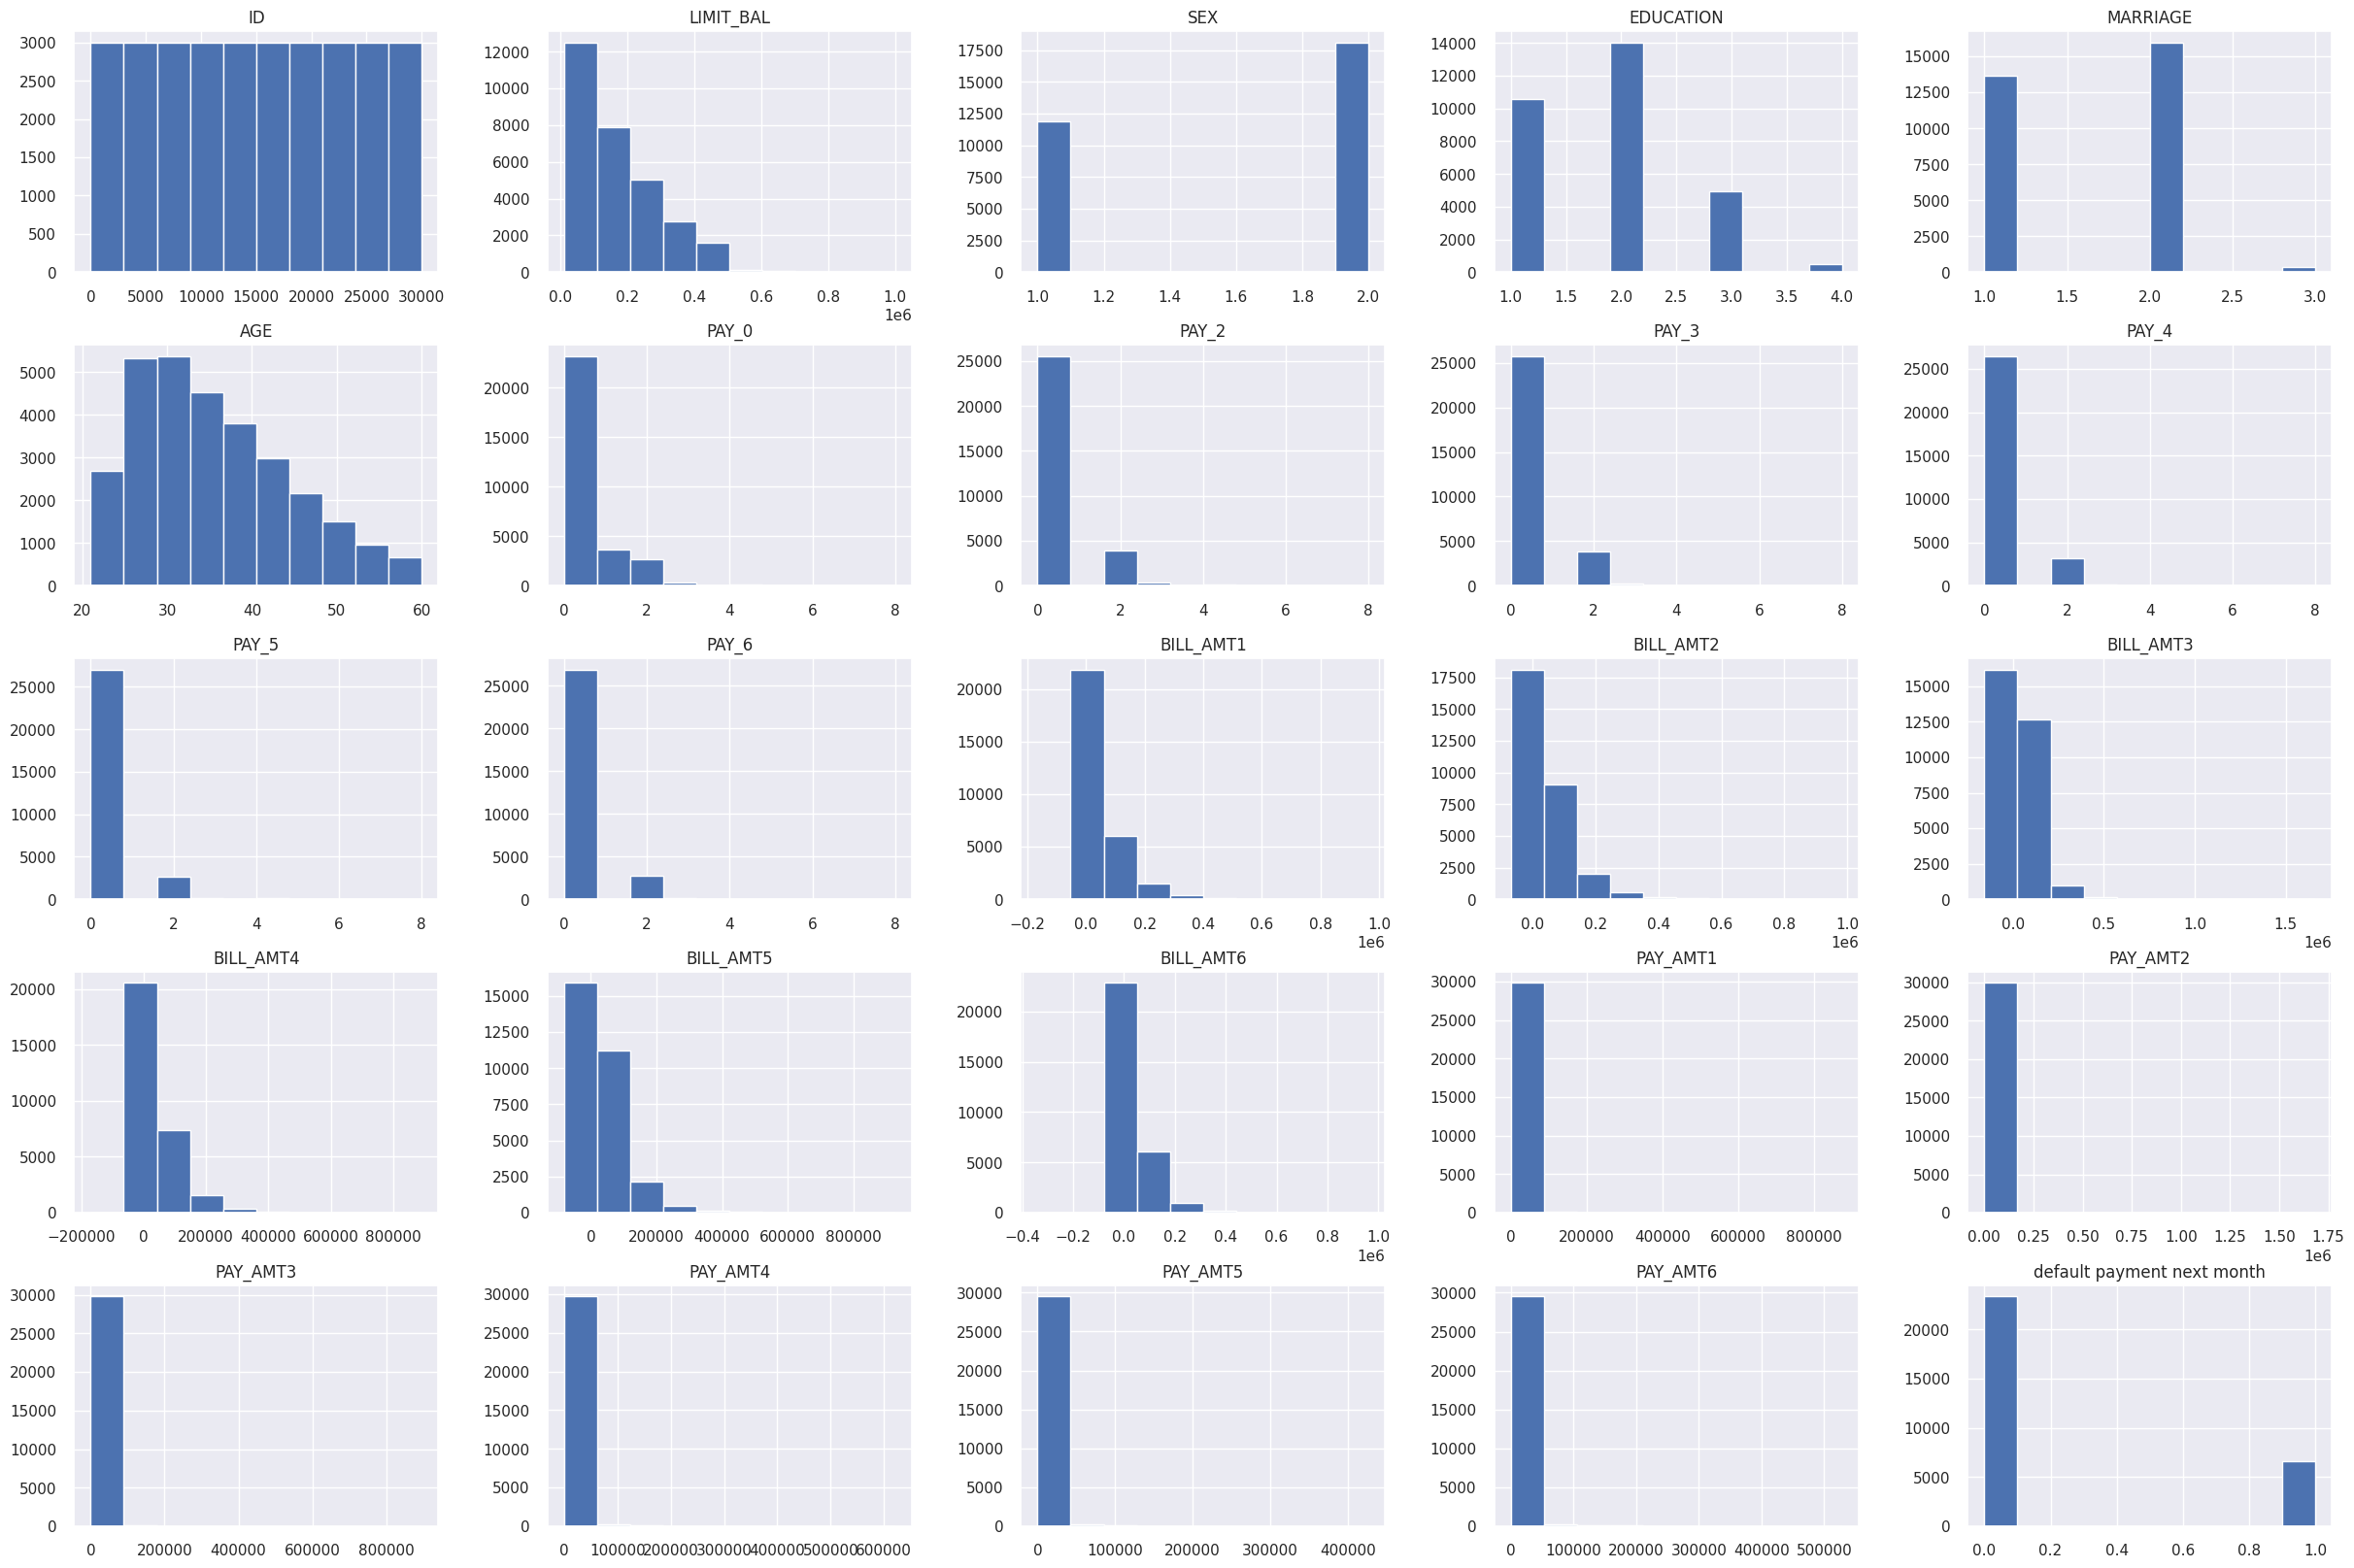

In [38]:
# Para poder tener una mejor idea de cómo las variables indicadas en la celda anterior pueden influir en la variable a predecir
# Se realiza una exploración general mediante Histogramas para tener una primera impesión del comportamiento de los datos y
# en específico las variables predictoras que podrían afectar el comportamiento "Impago(1)" . Por los momentos solo se aprecia
# como se distribuyen los datos.

credit_card_default.hist(figsize=(30,20))

<ipython-input-38-039cb56be6e8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


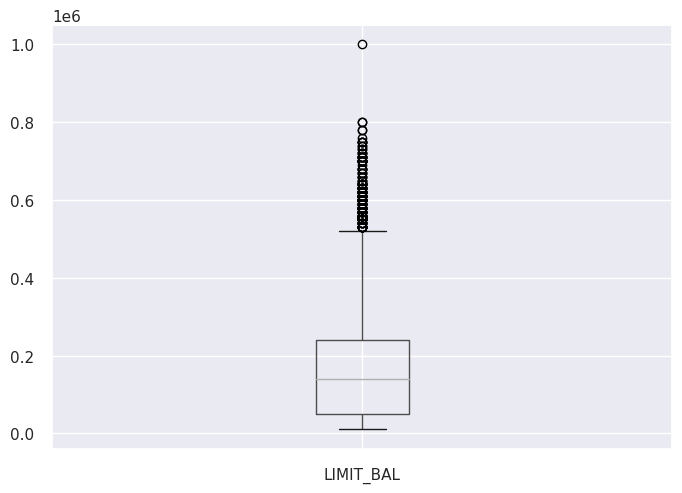

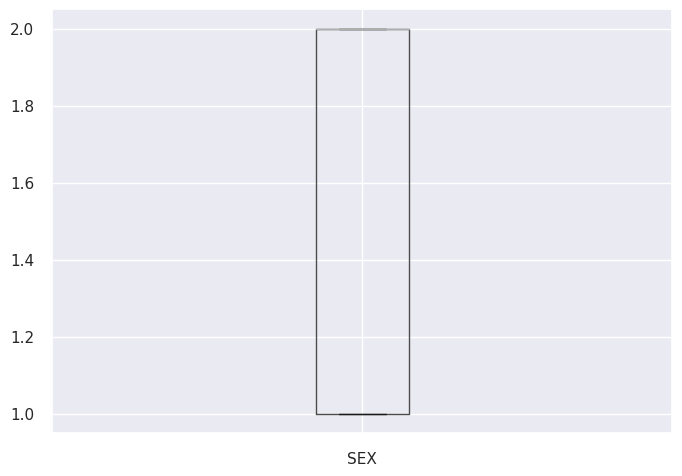

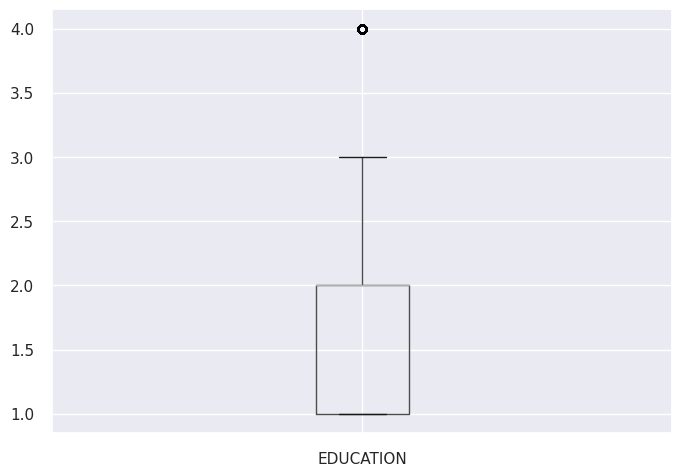

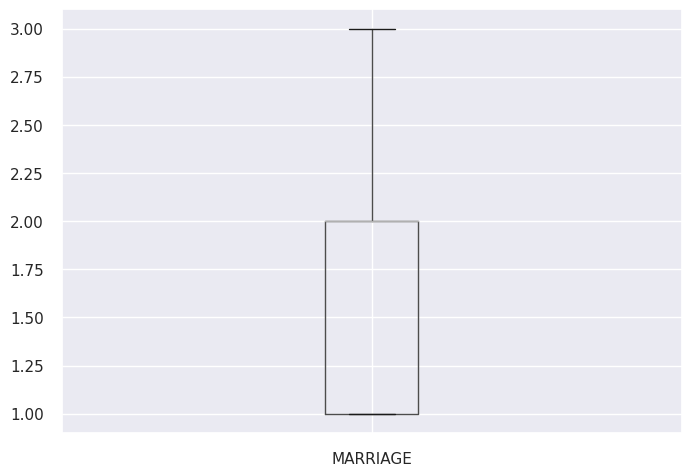

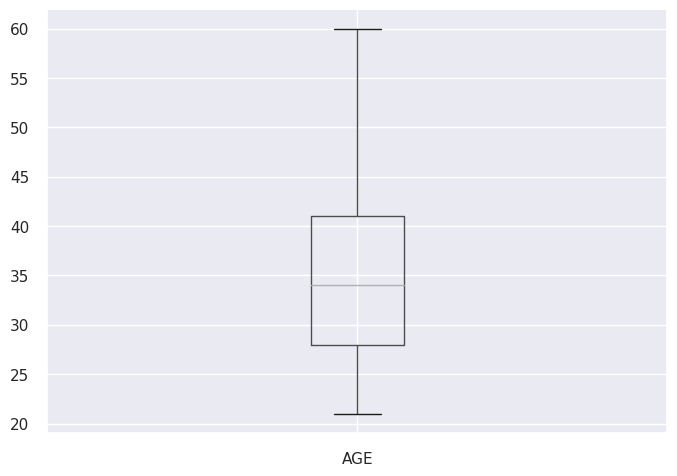

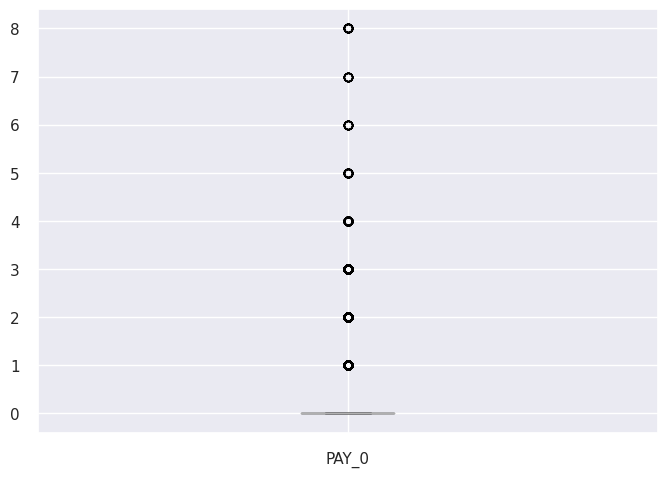

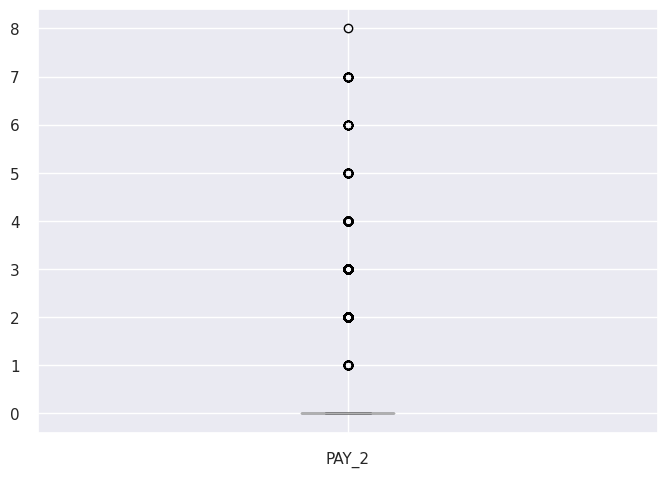

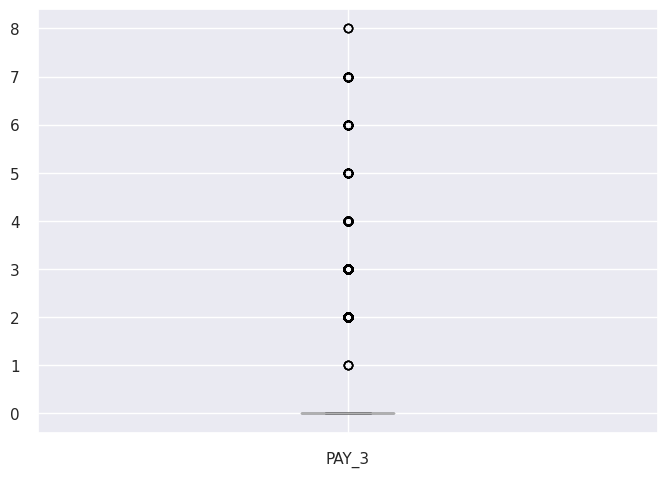

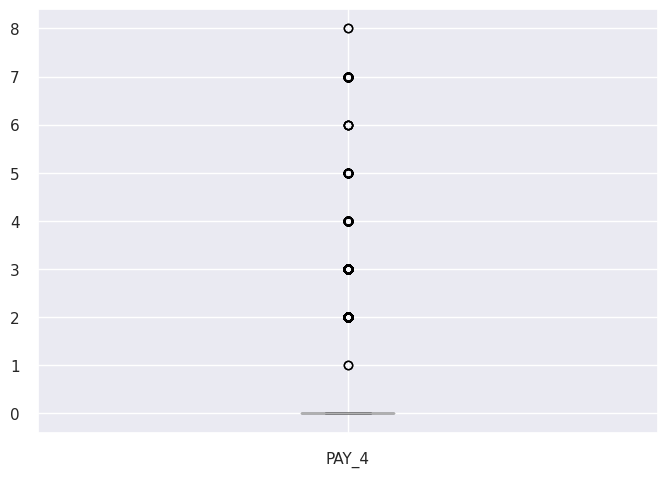

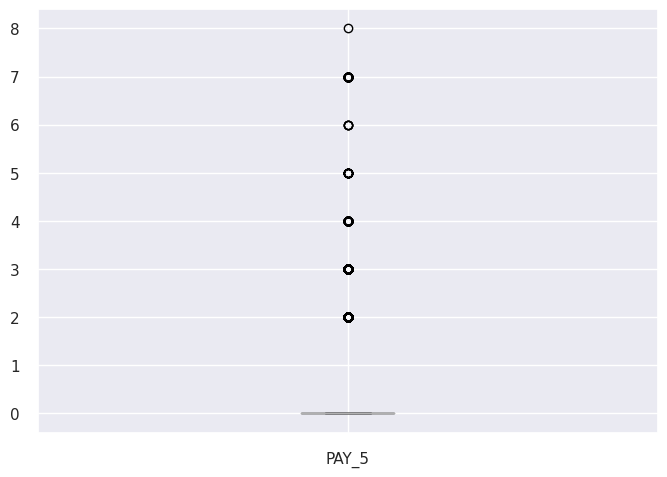

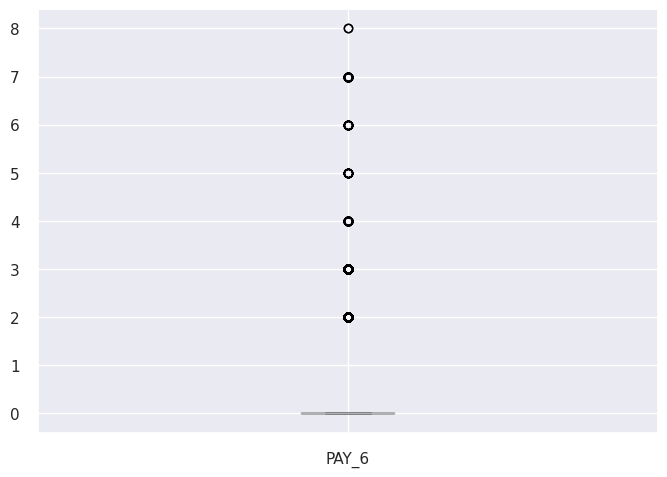

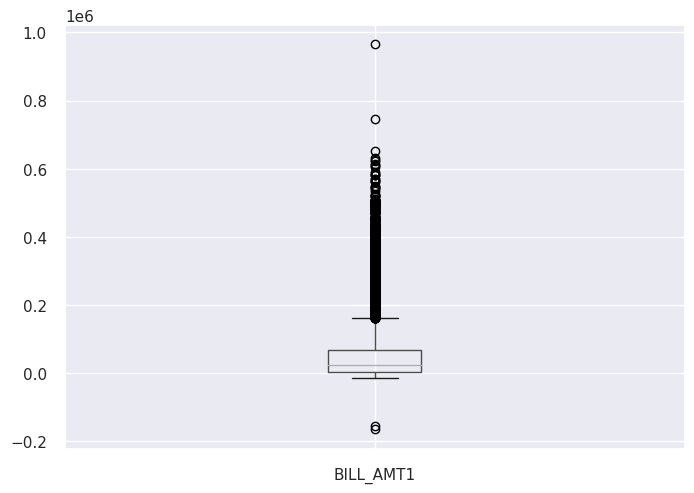

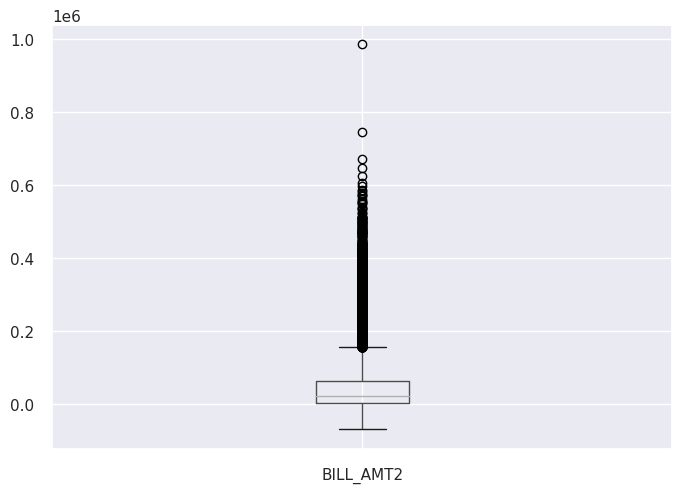

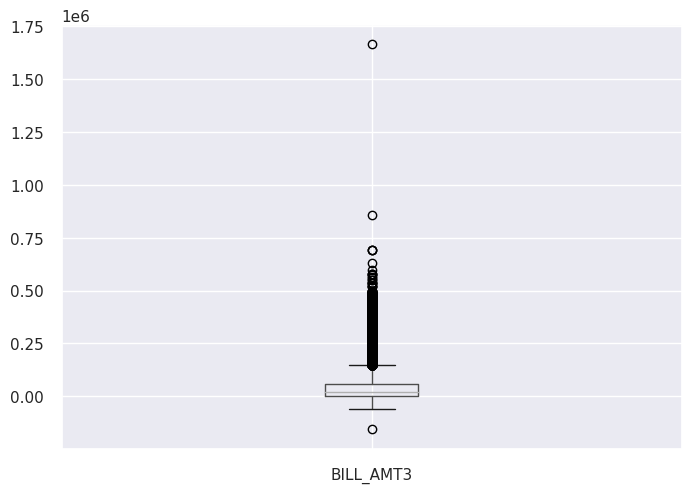

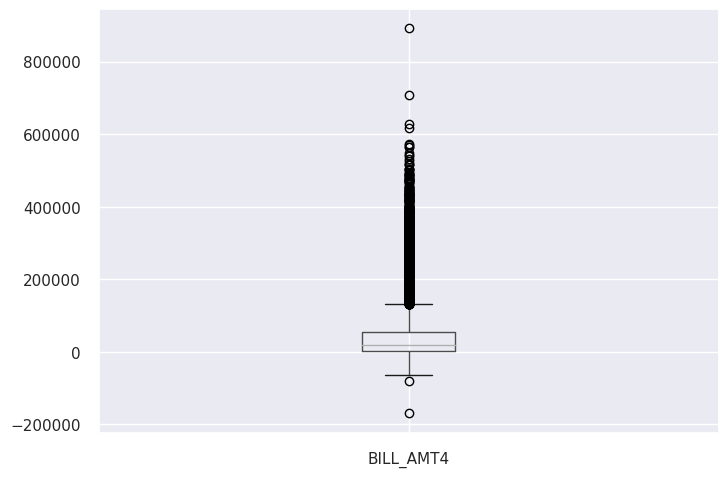

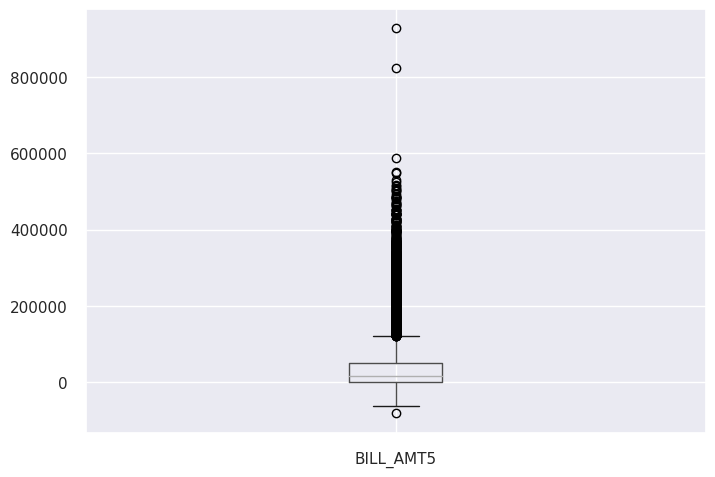

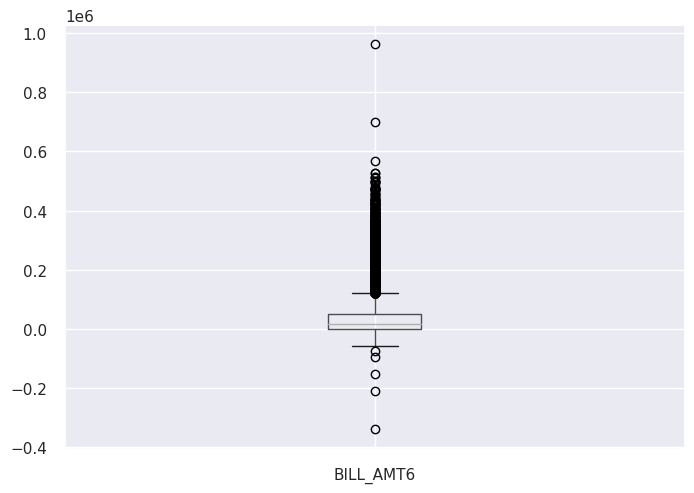

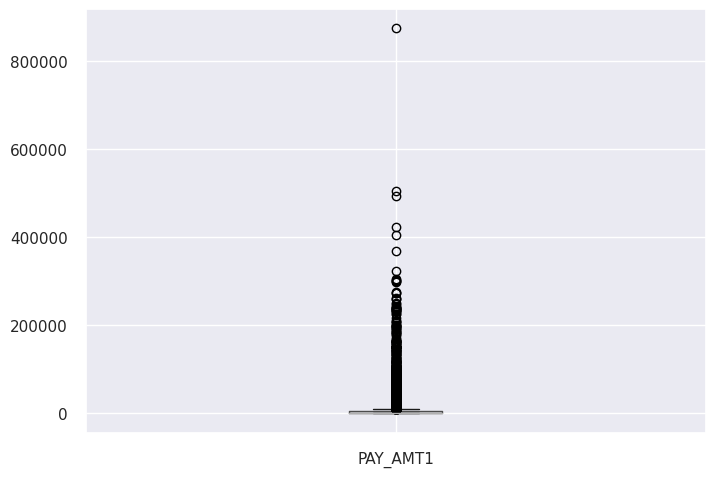

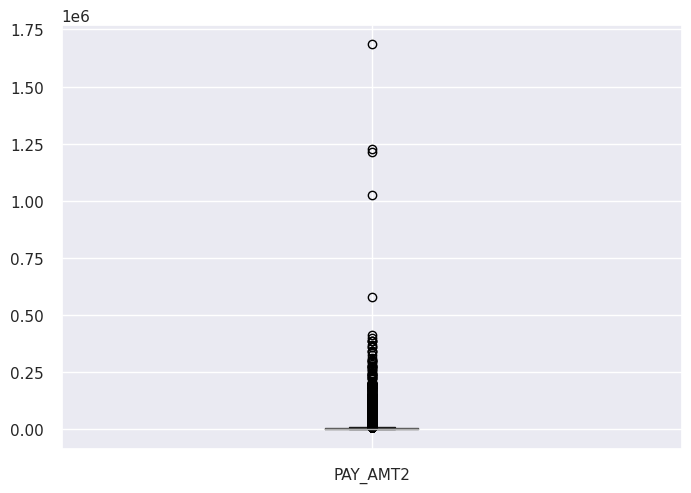

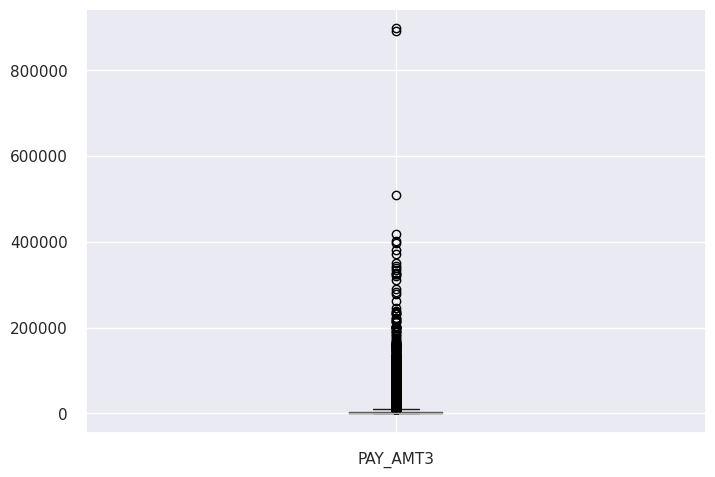

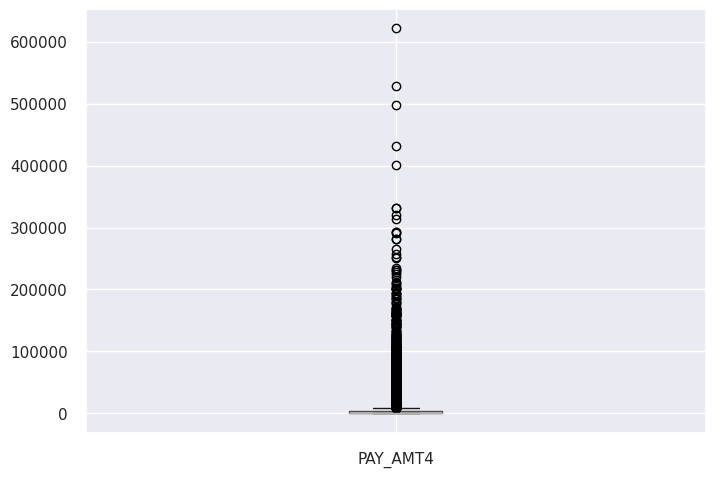

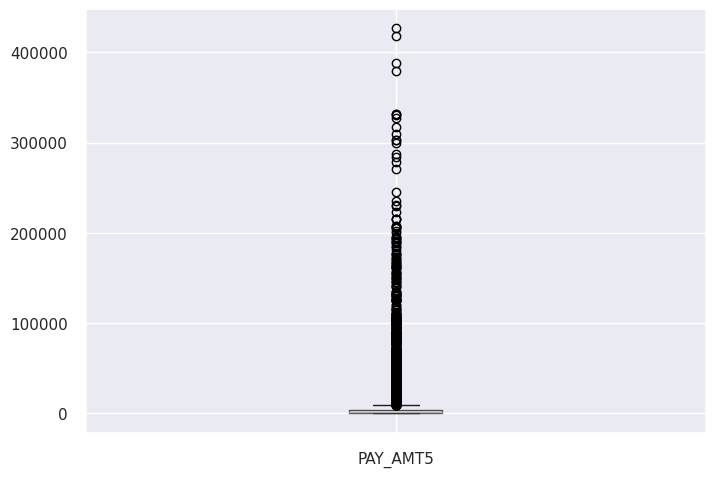

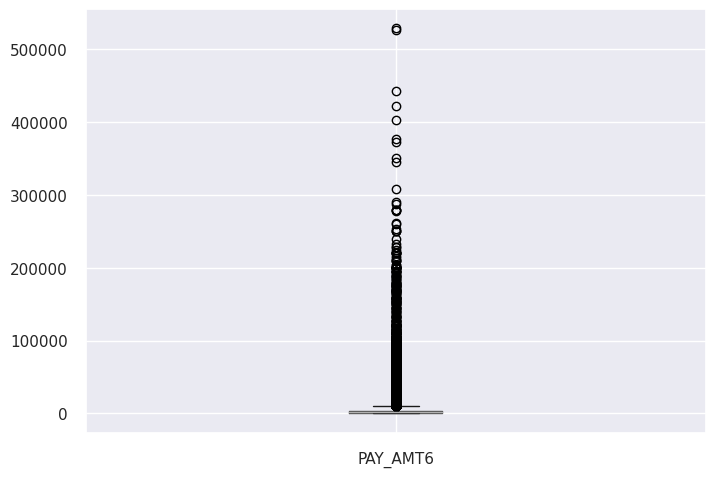

In [ ]:
# Mediante Boxplot se visualizan las distribuciones para así ver  posibles valores anómalos y atípicos
var = credit_card_default.columns[1:-1]
for column in var:
    plt.figure()
    credit_card_default.boxplot([column])

A continuación se grafican otras visualizaciones con BoxPlot pera esta vez para relacionarlos con la variable objetivo "default payment next month"

In [ ]:
# Se excluye columna ID del dataframe
l=[x for x in credit_card_default.columns if x not in ['ID']]


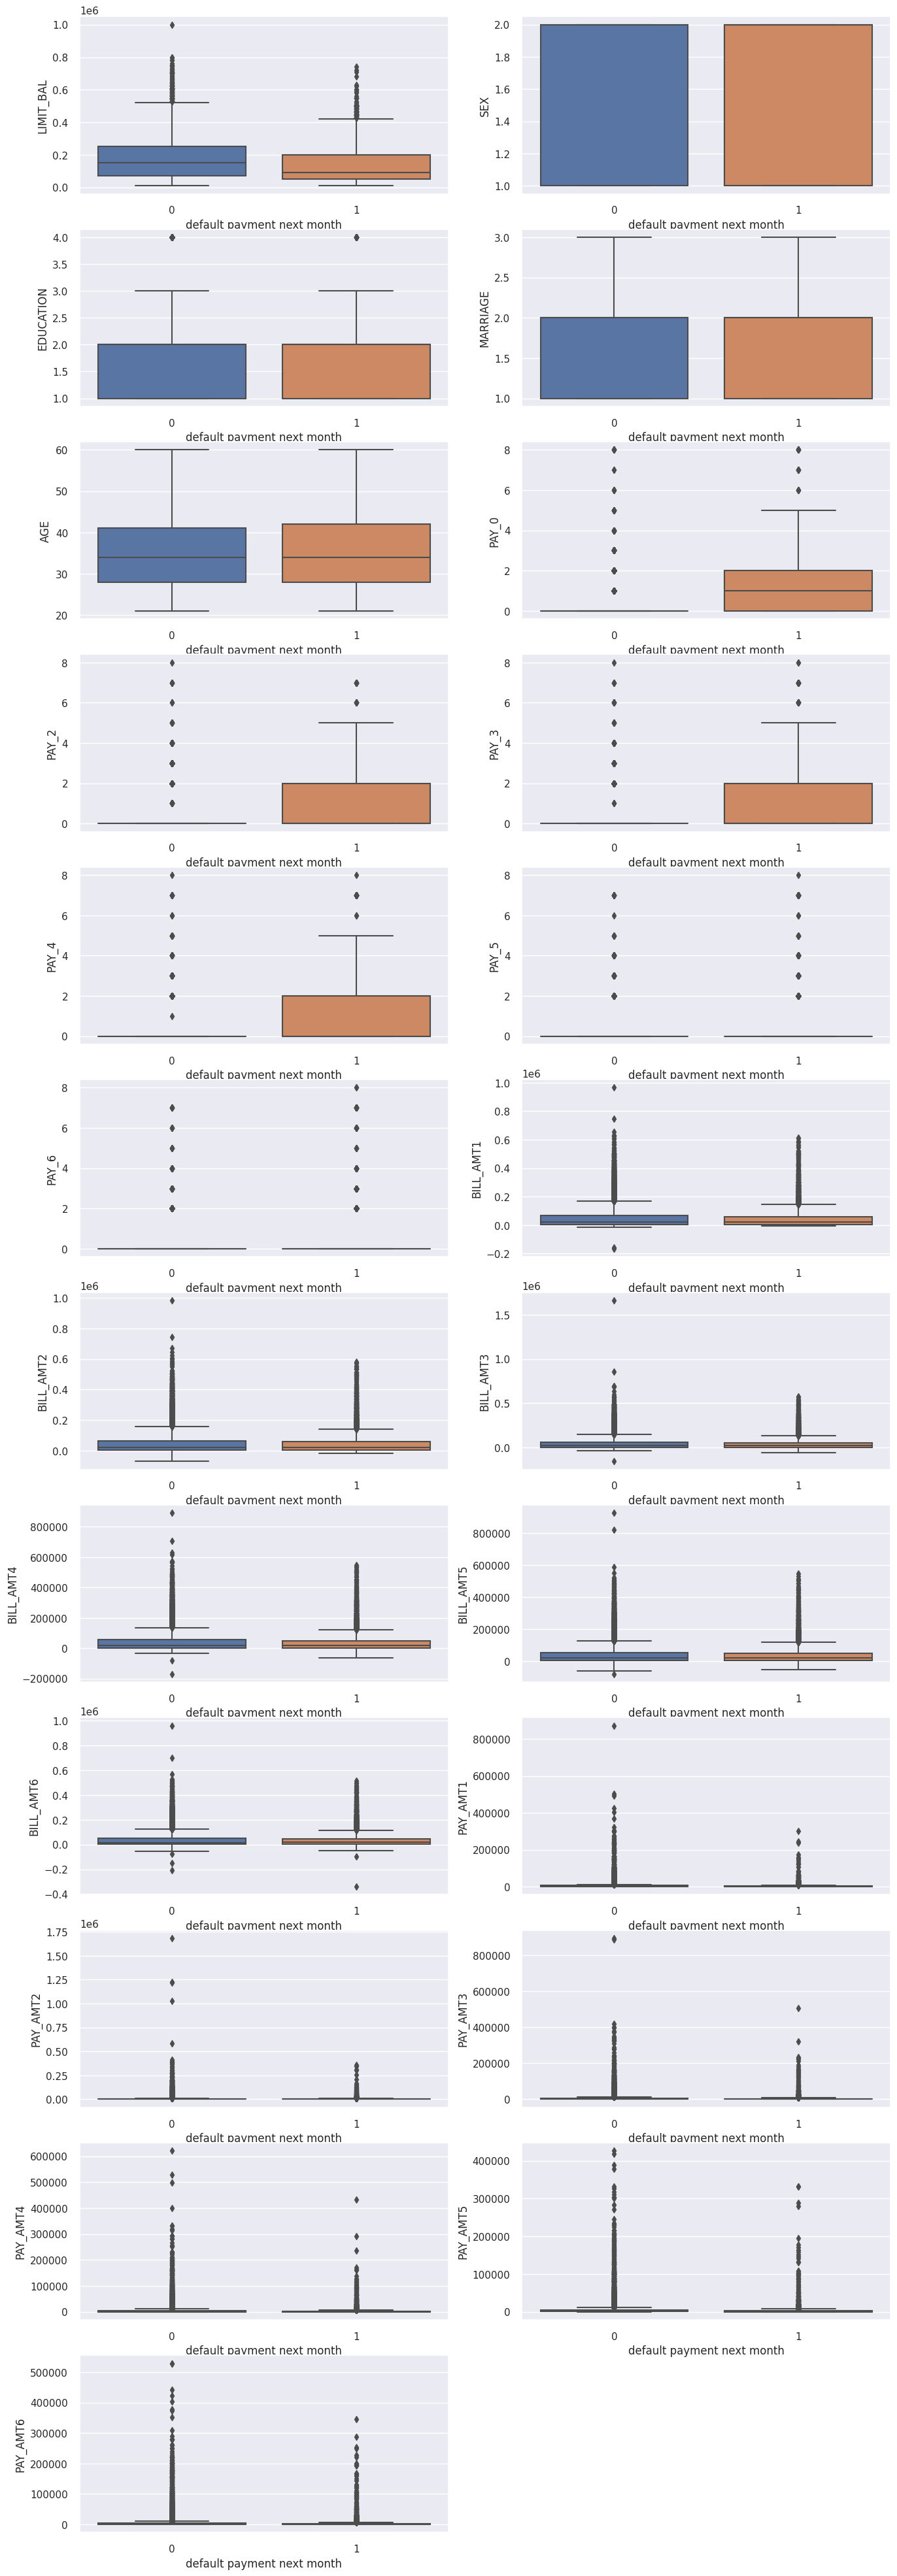

In [ ]:
# Se despliegan nuevos gráficos Boxplot de la variables y relaciones con la salida(Impago) columna = 'default payment next month'

plt.figure(figsize=(16,50))
for x,column in zip(range(23),credit_card_default[l]):
      if column != 'default payment next month':
        plt.subplot(12,2,x+1)
        sns.boxplot(data=credit_card_default[l], y=column, x=credit_card_default['default payment next month'])


En los Boxplot que visualizan los montos de créditos(LIMIT_BAL) muestra que la morosidad aumentaría al disminuir los montos, esto podría ser a que los clientes
con menos capacidad de pago reciben menos créditos, y a su vez tendrían mas dificultad para mantener su pagos al día.
Los gráficos para los Estados de Pago(Pay0 a Pay6) cláramente se ve que los clientes que van postergando sus pagos tienden a quedar en mora
Parar las columnas de Estado de cuenta(BILL_AMT) y Pagos mensuales(Pay_AMT) no se visualiza con claridad como afectarían a la salida (deafault payment next month), sin
embargo se evidencia la existencia de valores atípicos.
No se evidencia con claridad la edad, sexo, Nivel educativo, Estado civil pudieran afectar la tendencia de caer en "Impago", sin ambargo mas abajo se realiza
otro análisis y visualización del tipo categórico para esas variables.

In [ ]:
# Se conforma un dataFrame para variables categóricas
c = list(credit_card_default_2[['EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']].columns)
d = credit_card_default[c]
c

['EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default payment next month']

In [ ]:
# Se convierten los datos a tipo texto
for var in c:
    d[var] = d[var].astype('object')
d.dtypes

EDUCATION                     object
MARRIAGE                      object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
default payment next month    object
dtype: object

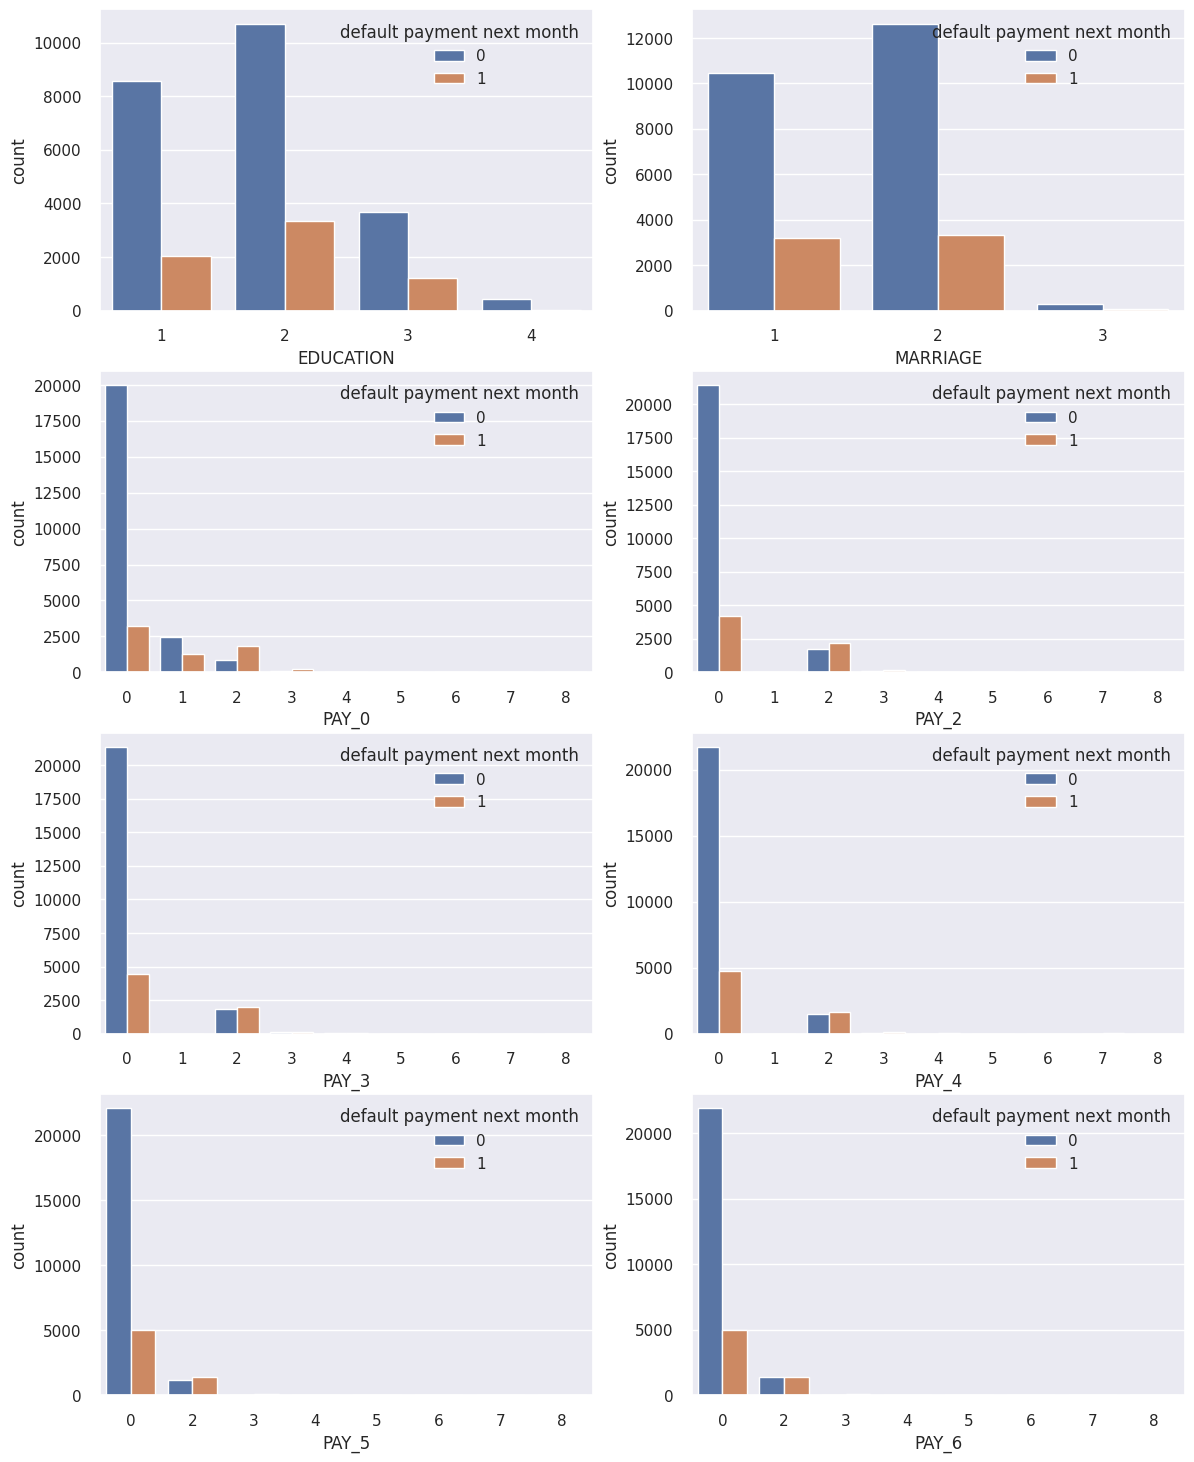

In [ ]:
# Se realizan visualizaciones para variables categóricas mediante gráfico de barras
from numpy.ma import count
plt.figure(figsize=(14,18))
for x,column in zip(range(9),d):
    if column != 'default payment next month':
      plt.subplot(4,2,x+1)
      sns.countplot(data=d, x=column, hue='default payment next month')



De acuerdo a los gráficos se puede observar:
1.   Pareciera que los clientes solteros poseen menos posibilidades de caer en
     "Default", al menos en proporción respecto a los casados.

2.   Los clientes que poseen formación universitaria representan una mayor
     proporción que no caen en mora.

3.   En los otros gráficos (PAY_O - PAY_6) se evidencia que
     los clientes que poseen un mejor comportamiento de pagos(Estado 0) es menos probable que caigan en "Default" comparados con los que posee 1, y 2 meses de atrasos. Los que se encuentran al día representan una mayor proporción de clientes que pagan el mes siguiente(No morosos) con respecto a los morosos.


## 8. Estructurando un Proyecto de DS

### En los pasos anteriores ya se han realizado algunos análisis exploratorios, los cuales se complementarán de acuerdo a los análisis que se muestran a continuación

In [ ]:
# Correlación de variables
credit_card_default.corr('pearson')

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.037659   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.231088   
SEX                         0.018497   0.024755  1.000000   0.013627   
EDUCATION                   0.037659  -0.231088  0.013627   1.000000   
MARRIAGE                   -0.028208  -0.111012 -0.028522  -0.136797   
AGE                         0.019198   0.145036 -0.090768   0.182928   
PAY_0                      -0.020978  -0.170745 -0.034475   0.055937   
PAY_2                      -0.010001  -0.197136 -0.044750   0.062739   
PAY_3                      -0.018820  -0.191323 -0.041227   0.053058   
PAY_4                       0.013700  -0.180629 -0.039737   0.051209   
PAY_5                      -0.020336  -0.170045 -0.038533   0.039623   
PAY_6                      -0.032450  -0.167820 -0.032061   0.028670   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.016597   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.011980   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.006714   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.006131   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.012439   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.012646   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.041088   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.032793   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.044293   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.040949   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.045138   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.044061   
default payment next month -0.013952  -0.153520 -0.039961   0.033842   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.028208  0.019198 -0.020978 -0.010001 -0.018820   
LIMIT_BAL                  -0.111012  0.145036 -0.170745 -0.197136 -0.191323   
SEX                        -0.028522 -0.090768 -0.034475 -0.044750 -0.041227   
EDUCATION                  -0.136797  0.182928  0.055937  0.062739  0.053058   
MARRIAGE                    1.000000 -0.414226 -0.011551 -0.009275  0.002556   
AGE                        -0.414226  1.000000 -0.001707 -0.008883 -0.014015   
PAY_0                      -0.011551 -0.001707  1.000000  0.698389  0.516970   
PAY_2                      -0.009275 -0.008883  0.698389  1.000000  0.663529   
PAY_3                       0.002556 -0.014015  0.516970  0.663529  1.000000   
PAY_4                      -0.003029 -0.007215  0.460224  0.512773  0.678931   
PAY_5                      -0.002497 -0.013415  0.424473  0.462717  0.551430   
PAY_6                       0.002793 -0.017314  0.373805  0.407086  0.492827   
BILL_AMT1                  -0.027832  0.055263 -0.000819  0.011684 -0.020586   
BILL_AMT2                  -0.025294  0.053302  0.009137  0.015932 -0.000968   
BILL_AMT3                  -0.029082  0.052754  0.013307  0.022950  0.002447   
BILL_AMT4                  -0.027274  0.050165  0.022100  0.032467  0.016579   
BILL_AMT5                  -0.029270  0.048023  0.030731  0.040422  0.026196   
BILL_AMT6                  -0.025066  0.046155  0.030201  0.042222  0.028979   
PAY_AMT1                   -0.004653  0.026332 -0.079177 -0.097475 -0.039356   
PAY_AMT2                   -0.009513  0.022243 -0.057189 -0.054838 -0.073670   
PAY_AMT3                   -0.004250  0.029225 -0.062620 -0.059865 -0.057702   
PAY_AMT4                   -0.013970  0.021715 -0.061886 -0.053981 -0.053849   
PAY_AMT5                   -0.003019  0.022510 -0.053784 -0.048714 -0.050805   
PAY_AMT6                   -0.008383  0.019606 -0.048733 -0.043099 -0.048443   
default payment next month -0.027575  0.013649  0.396019  0.327093  0.286999   

                               PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID

In [ ]:
credit_card_default.loc[:,'PAY_5':].corr('pearson')

PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  \
PAY_5                       1.000000  0.740357  -0.018581  -0.008614   
PAY_6                       0.740357  1.000000  -0.019581  -0.009790   
BILL_AMT1                  -0.018581 -0.019581   1.000000   0.951484   
BILL_AMT2                  -0.008614 -0.009790   0.951484   1.000000   
BILL_AMT3                   0.003377  0.001691   0.892279   0.928326   
BILL_AMT4                   0.024139  0.020598   0.860272   0.892482   
BILL_AMT5                   0.036216  0.041785   0.829779   0.859778   
BILL_AMT6                   0.042616  0.046012   0.802650   0.831594   
PAY_AMT1                   -0.053692 -0.047804   0.140277   0.280365   
PAY_AMT2                   -0.039586 -0.039868   0.099355   0.100851   
PAY_AMT3                   -0.037270 -0.040160   0.156887   0.150718   
PAY_AMT4                   -0.065943 -0.030460   0.158303   0.147398   
PAY_AMT5                   -0.051815 -0.066875   0.167026   0.157957   
PAY_AMT6                   -0.046110 -0.045358   0.179341   0.174256   
default payment next month  0.260850  0.244437  -0.019644  -0.014193   

                            BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
PAY_5                        0.003377   0.024139   0.036216   0.042616   
PAY_6                        0.001691   0.020598   0.041785   0.046012   
BILL_AMT1                    0.892279   0.860272   0.829779   0.802650   
BILL_AMT2                    0.928326   0.892482   0.859778   0.831594   
BILL_AMT3                    1.000000   0.923969   0.883910   0.853320   
BILL_AMT4                    0.923969   1.000000   0.940134   0.900941   
BILL_AMT5                    0.883910   0.940134   1.000000   0.946197   
BILL_AMT6                    0.853320   0.900941   0.946197   1.000000   
PAY_AMT1                     0.244335   0.233012   0.217031   0.199965   
PAY_AMT2                     0.316936   0.207564   0.181246   0.172663   
PAY_AMT3                     0.130011   0.300023   0.252305   0.233770   
PAY_AMT4                     0.143405   0.130191   0.293118   0.250237   
PAY_AMT5                     0.179712   0.160433   0.141574   0.307729   
PAY_AMT6                     0.182326   0.177637   0.164184   0.115494   
default payment next month  -0.014076  -0.010156  -0.006760  -0.005372   

                            PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
PAY_5                      -0.053692 -0.039586 -0.037270 -0.065943 -0.051815   
PAY_6                      -0.047804 -0.039868 -0.040160 -0.030460 -0.066875   
BILL_AMT1                   0.140277  0.099355  0.156887  0.158303  0.167026   
BILL_AMT2                   0.280365  0.100851  0.150718  0.147398  0.157957   
BILL_AMT3                   0.244335  0.316936  0.130011  0.143405  0.179712   
BILL_AMT4                   0.233012  0.207564  0.300023  0.130191  0.160433   
BILL_AMT5                   0.217031  0.181246  0.252305  0.293118  0.141574   
BILL_AMT6                   0.199965  0.172663  0.233770  0.250237  0.307729   
PAY_AMT1                    1.000000  0.285576  0.252191  0.199558  0.148459   
PAY_AMT2                    0.285576  1.000000  0.244770  0.180107  0.180908   
PAY_AMT3                    0.252191  0.244770  1.000000  0.216325  0.159214   
PAY_AMT4                    0.199558  0.180107  0.216325  1.000000  0.151830   
PAY_AMT5                    0.148459  0.180908  0.159214  0.151830  1.000000   
PAY_AMT6                    0.185735  0.157634  0.162740  0.157834  0.154896   
default payment next month -0.072929 -0.058579 -0.056250 -0.056827 -0.055124   

                            PAY_AMT6  default payment next month  
PAY_5                      -0.046110                    0.260850  
PAY_6                      -0.045358                    0.244437  
BILL_AMT1                   0.179341                   -0.019644  
BILL_AMT2                   0.174256                   -0.014193  
BILL_AMT3                   0.182326                   -0.014076  
BILL_AMT4 

Un nivel de correlación aunque muy bajo(entre 35% y 40%) existe entre las columnas de conducta de pago(PAY_0 - PAY_6) y la variable objetivo.

In [ ]:
# mediante ppscore
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(credit_card_default)
ppscoreT.loc[ppscoreT['y']=='default payment next month']

x                           y  ppscore  \
24                           ID  default payment next month      0.0   
49                    LIMIT_BAL  default payment next month      0.0   
74                          SEX  default payment next month      0.0   
99                    EDUCATION  default payment next month      0.0   
124                    MARRIAGE  default payment next month      0.0   
149                         AGE  default payment next month      0.0   
174                       PAY_0  default payment next month      0.0   
199                       PAY_2  default payment next month      0.0   
224                       PAY_3  default payment next month      0.0   
249                       PAY_4  default payment next month      0.0   
274                       PAY_5  default payment next month      0.0   
299                       PAY_6  default payment next month      0.0   
324                   BILL_AMT1  default payment next month      0.0   
349                   BILL_AMT2  default payment next month      0.0   
374                   BILL_AMT3  default payment next month      0.0   
399                   BILL_AMT4  default payment next month      0.0   
424                   BILL_AMT5  default payment next month      0.0   
449                   BILL_AMT6  default payment next month      0.0   
474                    PAY_AMT1  default payment next month      0.0   
499                    PAY_AMT2  default payment next month      0.0   
524                    PAY_AMT3  default payment next month      0.0   
549                    PAY_AMT4  default payment next month      0.0   
574                    PAY_AMT5  default payment next month      0.0   
599                    PAY_AMT6  default payment next month      0.0   
624  default payment next month  default payment next month      1.0   

               case  is_valid_score               metric  baseline_score  \
24       regression            True  mean absolute error          0.2182   
49       regression            True  mean absolute error          0.2182   
74       regression            True  mean absolute error          0.2182   
99       regression            True  mean absolute error          0.2182   
124      regression            True  mean absolute error          0.2182   
149      regression            True  mean absolute error          0.2182   
174      regression            True  mean absolute error          0.2182   
199      regression            True  mean absolute error          0.2182   
224      regression            True  mean absolute error          0.2182   
249      regression            True  mean absolute error          0.2182   
274      regression            True  mean absolute error          0.2182   
299      regression            True  mean absolute error          0.2182   
324      regression            True  mean absolute error          0.2182   
349      regression            True  mean absolute error          0.2182   
374      regression            True  mean absolute error          0.2182   
399      regression            True  mean absolute error          0.2182   
424      regression            True  mean absolute error          0.2182   
449      regression            True  mean absolute error          0.2182   
474      regression            True  mean absolute error          0.2182   
499      regression            True  mean absolute error          0.2182   
524      regression            True  mean absolute error          0.2182   
549      regression            True  mean absolute error          0.2182   
574      regression            True  mean absolute error          0.2182   
599      regression            True  mean absolute error          0.2182   
624  predict_itself            True                 None          0.0000   

     model_score                    model  
24      0.343400  DecisionTreeRegressor()  
49      0.328192  DecisionTreeRegressor()  
74      0.341115  DecisionTreeRegressor()  
99  

Mediante ppscore no se evidencia correlación alguna

A continuación se visualizan relaciones gráficas nediante "pairplot"

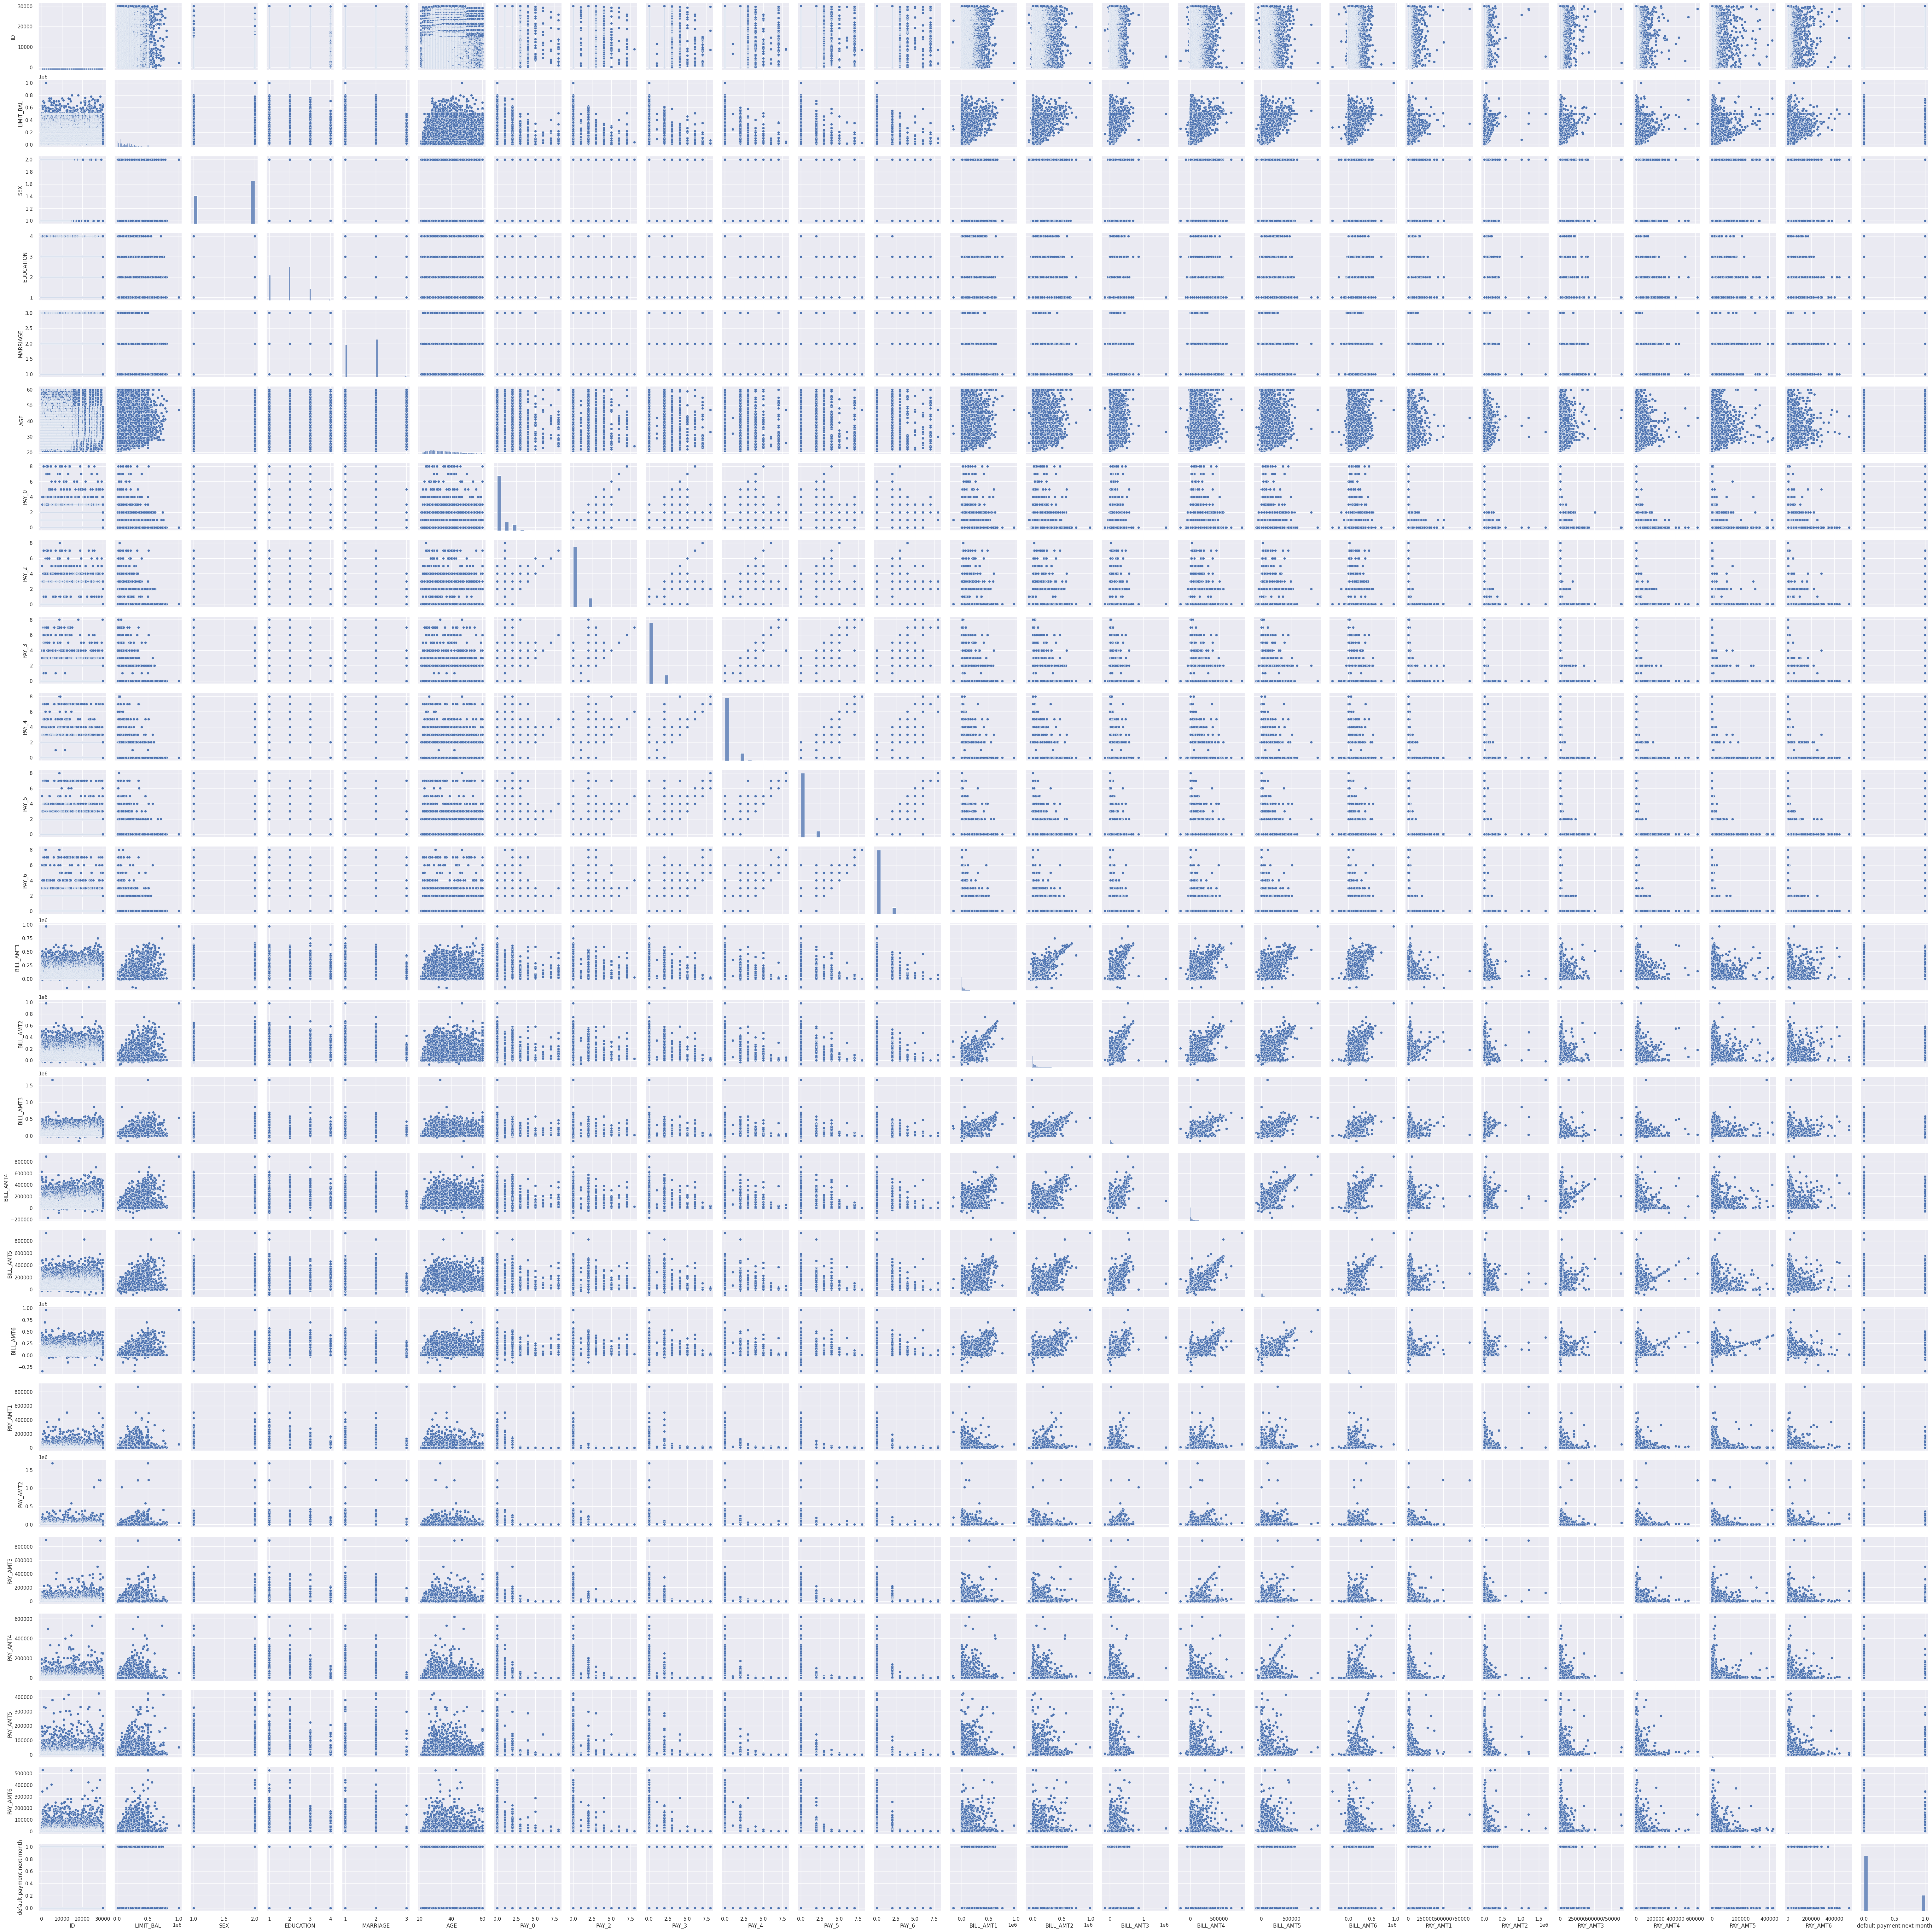

In [ ]:
# Gráficos
#credit_card_default.dtypes

sns.pairplot(credit_card_default).savefig('graficas.png')

<Axes: xlabel='x', ylabel='y'>

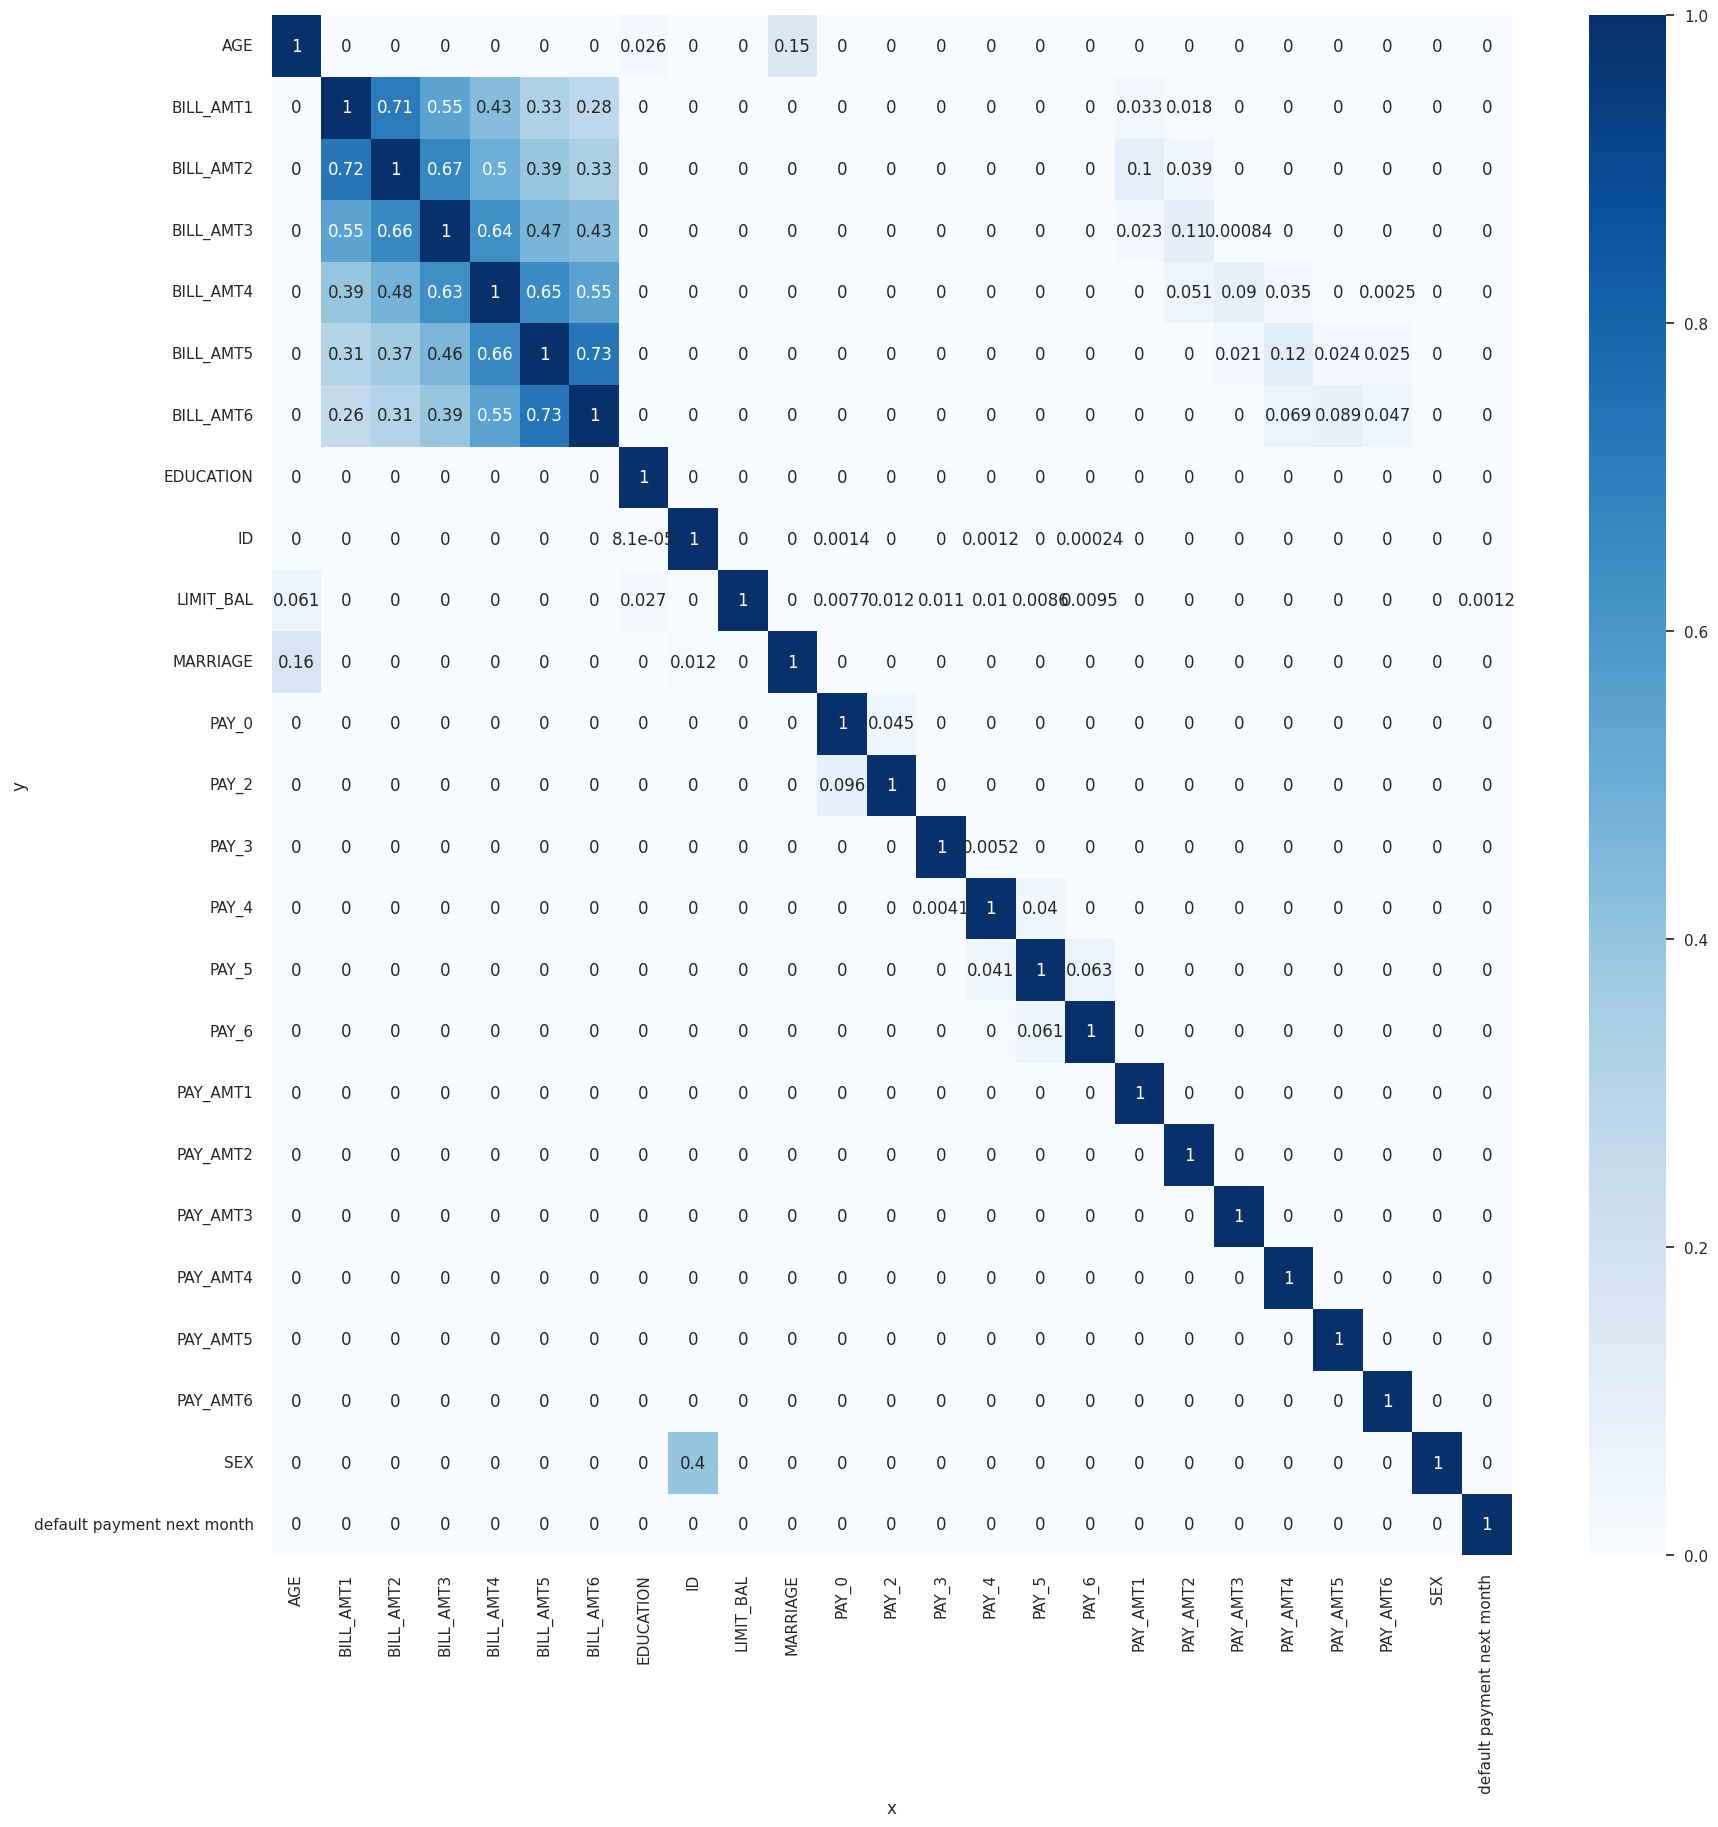

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
matrix_df = ppscoreT[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#matrix_df = tabla.corr('spearman')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot=True, ax = ax)


### Aun cuando en los análisis de las entregas anteriores muestra una aparente relación de las variables como Estado Civil, Nivel Educativo, Estado de Pago(PAY_0 a PAY_6) en la posibilidad que el cliente sea moroso o no, al aplicar otros análisis en este apartado, pareciera mas bien no exista alguna relación, como lo evidencia los cálculos de las correlaciones mediante 'pearson' y ppscore.
### Igualmente al desplegar los gráficos de dispersión mediantes sns.pairplot() no se evidencia una correlación clara entre las variables (predictoras) y la variable a predecir o "target" (Moroso o no moroso). Esto puede deberse a que la variable a predecir es del tipo categórica( solo puede ser "0" o "1"). Sin embargo según se muestra en en este nuevo análisis al menos existe algún tipo de correlación entre algunas variables predictoras (Entre los Estados de pago por ejemplo), También la correlación de 'Pearson' muestra cierta relación (entre 30% y 40%) con respecto a la variable objetivo.

## 9. Estructurando un Proyecto de DS-ParteIII

### Siguiendo en sintonía con las consignas de esta entrega se trabajará de acuerdo a los pasos:


### 9.1. Selección de Features mediante librería SequentialFeatureSelector y el método Forward


Para realizar la selección de variables o features se utilizará la función Sequential Forward Selector, pero antes se prepararán los datos, para asegurarse que sean del tipo numéricos y aplicar un escalamiento sobre los mismos

In [ ]:
credit_card_default.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Se seleccionan las columnas numéricas
num=[x for x in credit_card_default.columns if x not in ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']]
num

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
# Antes de seleccionar las mejores variables predictoras se realiza un escalamiento
# de las columnas numméricas
credit_card_default_scalar = credit_card_default.copy()
scaler = MinMaxScaler()
scaler.fit(credit_card_default[num])
credit_card_default_scalar[num] = scaler.transform(credit_card_default[num])
credit_card_default_scalar

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  \
0          1   0.010101    2          2         1  0.076923      2      2   
1          2   0.111111    2          2         2  0.128205      0      2   
2          3   0.080808    2          2         2  0.333333      0      0   
3          4   0.040404    2          2         1  0.410256      0      0   
4          5   0.040404    1          2         1  0.923077      0      0   
...      ...        ...  ...        ...       ...       ...    ...    ...   
29995  29996   0.212121    1          3         1  0.461538      0      0   
29996  29997   0.141414    1          3         2  0.564103      0      0   
29997  29998   0.020202    1          2         2  0.410256      4      3   
29998  29999   0.070707    1          3         1  0.512821      1      0   
29999  30000   0.040404    1          2         1  0.641026      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0      0  ...   0.160138   0.080648   0.260979  0.000000  0.000409   
1          0      0  ...   0.163220   0.084074   0.263485  0.000000  0.000594   
2          0      0  ...   0.173637   0.095470   0.272928  0.001738  0.000891   
3          0      0  ...   0.186809   0.109363   0.283685  0.002290  0.001199   
4          0      0  ...   0.179863   0.099633   0.275681  0.002290  0.021779   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...   0.243036   0.111622   0.273259  0.009730  0.011875   
29996      0      0  ...   0.168596   0.085794   0.260979  0.002103  0.002094   
29997      2      0  ...   0.179805   0.101057   0.275854  0.000000  0.000000   
29998      0      0  ...   0.209850   0.092403   0.298591  0.098334  0.002024   
29999      0      0  ...   0.194553   0.112803   0.272746  0.002379  0.001069   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      0.000000  0.000000  0.000000  0.000000                           1  
1      0.001116  0.001610  0.000000  0.003783                           1  
2      0.001116  0.001610  0.002345  0.009458                           0  
3      0.001339  0.001771  0.002506  0.001892                           0  
4      0.011160  0.014493  0.001615  0.001284                           0  
...         ...       ...       ...       ...                         ...  
29995  0.005583  0.004907  0.011723  0.001892                           0  
29996  0.010042  0.000208  0.000000  0.000000                           0  
29997  0.024552  0.006763  0.004689  0.005864                           1  
29998  0.001315  0.003101  0.124174  0.003412                           1  
29999  0.001596  0.001610  0.002345  0.001892                           1  

[30000 rows x 25 columns]

In [ ]:
# Se consulta los valores Max , Min para verificar el correcto escalamiento
credit_card_default_scalar[num].describe().loc[['max', 'min']]

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
max        1.0  1.0        1.0        1.0        1.0        1.0        1.0   
min        0.0  0.0        0.0        0.0        0.0        0.0        0.0   

     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
max        1.0       1.0       1.0       1.0       1.0       1.0       1.0  
min        0.0       0.0       0.0       0.0       0.0       0.0       0.0

In [ ]:
predictoras = credit_card_default_scalar.loc[:, credit_card_default_scalar.columns[1:-1]]
target = credit_card_default_scalar.loc[:, credit_card_default_scalar.columns[-1]]

In [ ]:
# Mediante Sequential Forward Selection(sfs) se obtienen las mejores variables utilizando el algoritmo
# de Regresión Logística
sfs = SFS(LogisticRegression(),
          k_features= 11,
          forward=True,
          floating=False,
          verbose=0,
          scoring = 'precision',
          cv = 0)

In [ ]:
# Se obtiene las variables predictoras
sfs.fit(predictoras, target)
sfs.k_feature_names_

('LIMIT_BAL',
 'SEX',
 'AGE',
 'PAY_0',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT5',
 'PAY_AMT6')

In [ ]:
# Se construye el dataSet con las variables seleccionadas por el algoritmo SequentialFeatureSelector
predictoras_Reg = predictoras[['EDUCATION',
 'PAY_0',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']]
predictoras_Reg

EDUCATION  PAY_0  PAY_4  PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0              2      2      0      0      0  0.000000  0.000409  0.000000   
1              2      0      0      0      2  0.000000  0.000594  0.001116   
2              2      0      0      0      0  0.001738  0.000891  0.001116   
3              2      0      0      0      0  0.002290  0.001199  0.001339   
4              2      0      0      0      0  0.002290  0.021779  0.011160   
...          ...    ...    ...    ...    ...       ...       ...       ...   
29995          3      0      0      0      0  0.009730  0.011875  0.005583   
29996          3      0      0      0      0  0.002103  0.002094  0.010042   
29997          2      4      0      0      0  0.000000  0.000000  0.024552   
29998          3      1      0      0      0  0.098334  0.002024  0.001315   
29999          2      0      0      0      0  0.002379  0.001069  0.001596   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      0.000000  0.000000  0.000000  
1      0.001610  0.000000  0.003783  
2      0.001610  0.002345  0.009458  
3      0.001771  0.002506  0.001892  
4      0.014493  0.001615  0.001284  
...         ...       ...       ...  
29995  0.004907  0.011723  0.001892  
29996  0.000208  0.000000  0.000000  
29997  0.006763  0.004689  0.005864  
29998  0.003101  0.124174  0.003412  
29999  0.001610  0.002345  0.001892  

[30000 rows x 11 columns]

### 9.2. Selección de algoritmo de Clasificación
La variable a predecir o Target es del tipo Categórica: 'default payment next month', esta variable es True (1) cuando el cliente que posee un crédito cae en la categoría de moroso. En las celdas siguientes se trabajará con el algoritmo de regresión logística para entrenar a los datos seleccionados, y ver como se empieza la evaluación por un algoritmo mas sencillo y luego pasar a otros modelos más poderosos.


In [ ]:
# Preparar los Sets para Entrenamiento y Prueba
# DataSets para algoritmo LogicRegression
# Mediante la función train_test_split se obtienen subconjuntos de datos para el entrenamiento y la prueba
# en la proporcion de 75% para Entrenamiento y 25% para el test o prueba
train_inputs_Reg, test_inputs_Reg, train_targets_Reg, test_targets_Reg = train_test_split(predictoras_Reg,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=20)

In [ ]:
train_inputs_Reg

EDUCATION  PAY_0  PAY_4  PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
13732          1      0      0      0      0  0.012103  0.000000  0.315345   
17857          1      0      0      0      0  0.004007  0.002844  0.003451   
15350          3      2      2      2      2  0.002633  0.000891  0.000000   
6576           3      0      0      0      0  0.002862  0.000000  0.000516   
29789          2      0      0      0      0  0.011448  0.005804  0.013392   
...          ...    ...    ...    ...    ...       ...       ...       ...   
23452          2      0      0      0      0  0.007371  0.007150  0.006522   
23775          2      0      0      0      0  0.001590  0.000951  0.001744   
4367           2      0      0      0      0  0.002383  0.001025  0.001131   
27098          1      1      0      0      0  0.000000  0.000000  0.000000   
15715          1      0      0      0      0  0.000000  0.001852  0.010183   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  
13732  0.017713  0.022442  0.016888  
17857  0.005069  0.006989  0.007400  
15350  0.005475  0.000000  0.002270  
6576   0.000000  0.007195  0.000530  
29789  0.017713  0.051579  0.018736  
...         ...       ...       ...  
23452  0.007523  0.034521  0.008378  
23775  0.013688  0.002579  0.000946  
4367   0.001709  0.002661  0.001676  
27098  0.000285  0.011057  0.001892  
15715  0.363311  0.017450  0.131558  

[22500 rows x 11 columns]

In [ ]:
train_targets_Reg


13732    0
17857    0
15350    1
6576     0
29789    0
        ..
23452    0
23775    0
4367     0
27098    0
15715    0
Name: default payment next month, Length: 22500, dtype: int64

##9.3 Entrenamiento del Algoritmo

In [ ]:
model = LogisticRegression(random_state=40)

In [ ]:
model.fit(train_inputs_Reg, train_targets_Reg)

LogisticRegression(random_state=40)

In [ ]:
train_pred_Reg = model.predict(train_inputs_Reg)
prob_Reg = model.predict_proba(train_inputs_Reg)
prob_Reg

array([[0.9239076 , 0.0760924 ],
       [0.86340786, 0.13659214],
       [0.24329295, 0.75670705],
       ...,
       [0.85609146, 0.14390854],
       [0.69468119, 0.30531881],
       [0.94567387, 0.05432613]])

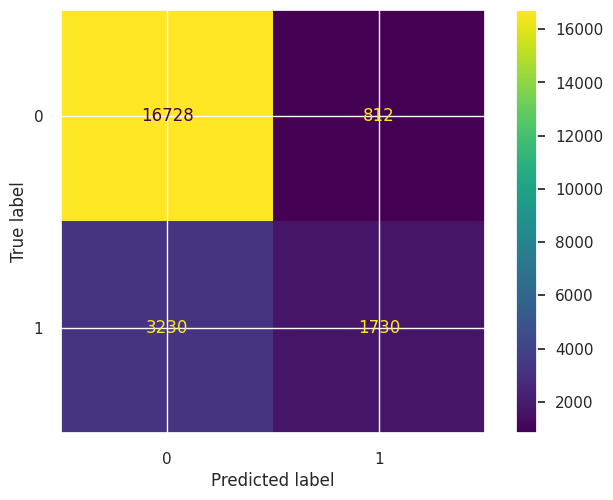

0    19958
1     2542
dtype: int64

In [ ]:
# Realizamos la Matriz de Confusión
confusion_matrix = metrics.confusion_matrix(y_true=train_targets_Reg, y_pred=train_pred_Reg)

# Establecemos las etiquetas
dsp = metrics.ConfusionMatrixDisplay(confusion_matrix)


# Visualización del Gráfico
dsp.plot()
plt.show()
pd.Series(train_pred_Reg).value_counts()

In [ ]:
pd.Series(train_pred_Reg).value_counts()
pd.Series(train_targets_Reg).value_counts()

0    17540
1     4960
Name: default payment next month, dtype: int64

Al entrenar el modelo y mediante el método de probabilidades(predict_proba) se observa como los verdaderos positivos varian entre 76% y 95%, en el caso de la primera fila del Array precedente el algoritmo da con una certeza del 79% que el resultado es Cliente moroso y con un 20% de probabilidad de equivovar el pronostico (No moroso). La matriz de confusión evidencia la baja relación entre los verdaderos Positivos(1730) y la suma de todos los valores(TP+FP), en la siguiente sección se analiza la métrica que permita tener una mejor apreciación de donde se ubica dentro de una banda de confiabilidad.

### 9.4. Cálculo de Métricas

In [ ]:
# Se importan librerias para cálculo de métricas
from sklearn.metrics import precision_score, classification_report

In [ ]:
## Como el objetivo es predecir si el cliente del crédito no va a pagar, la mejor métrica
# que se ajusta es la de Precisión, en este caso el valor True refleja que el cliente No pagará es decir será moroso
# por tanto se desea tener la mejor relación entre la mayor cantidad de aciertos (Verdadero Positivos) y
# la suma de TP + FP
print("Precisión LogicRegression - ", precision_score(train_targets_Reg, train_pred_Reg))

Precisión LogicRegression -  0.6805664830841857


In [ ]:
print(classification_report(train_targets_Reg, train_pred_Reg, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.68      0.35      0.46      4960
           0       0.84      0.95      0.89     17540

    accuracy                           0.82     22500
   macro avg       0.76      0.65      0.68     22500
weighted avg       0.80      0.82      0.80     22500



Los resultados de la métrica arroja una Presición de alrededor de 74% lo cual no resulta ser la mejor perfomance esperada, ya que se encuentra por fuera de un intervalo de confianza del 90%. Pueda se requiera probar con mas cantidad de variables, para esta entrega se está probando con 11 variables de un total de 23. Igualmente se podría realizar una nueva exploración para revisar que datos podrían estar afectando los resultado, considerar los atípicos que también  podrían estar afectando.

## 10. Validación de Modelos ML (Desafío Opcional)

En las siguientes celdas se prueban 3 modelos de predicción más, adicionales a al modelo LogicRegression con el que se trabajó en el apartado anterior ProyectoDS_ParteIII.

### 10.1 Primero se realizará la selección de las variables predictoras para cada uno de los modelos seleccionados en este caso: Decision Tree Classifier, Random Forest Classifier, y MLP Classifier

In [ ]:
# Selección de Features mediante DecisionTreeClassifier
sfs = SFS(DecisionTreeClassifier(max_depth= 4),
          k_features= 11,
          forward=True,
          floating=False,
          verbose=0,
          scoring = 'precision',
          cv = 0)
sfs.fit(predictoras, target)
sfs.k_feature_names_

('SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT5')

In [ ]:
# Selección de Features mediante RandomForestClassifier
sfs = SFS(RandomForestClassifier(max_depth= 4),
          k_features= 11,
          forward=True,
          floating=False,
          verbose=0,
          scoring = 'precision',
          cv = 0)
sfs.fit(predictoras, target)
sfs.k_feature_names_

('LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT5',
 'PAY_AMT1',
 'PAY_AMT3')

Se conforman los Datasets para las variables ya seleccionadas para cada uno de los 3 algoritmos a entrenar

In [ ]:
# DataFrame con las variables seleccionadas mediante DecisionTreeClassifier
predictoras_DTC = predictoras[['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT6']]
predictoras_DTC

SEX  EDUCATION  MARRIAGE       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0        2          2         1  0.051724   0.149982   0.069164   0.086723   
1        2          2         2  0.086207   0.148892   0.067858   0.087817   
2        2          2         2  0.224138   0.172392   0.079532   0.093789   
3        2          2         1  0.275862   0.188100   0.111995   0.113407   
4        1          2         1  0.620690   0.154144   0.071601   0.106020   
...    ...        ...       ...       ...        ...        ...        ...   
29995    1          3         1  0.310345   0.313716   0.249208   0.200746   
29996    1          3         2  0.379310   0.148008   0.067955   0.088267   
29997    1          2         2  0.275862   0.149674   0.069405   0.087859   
29998    1          3         1  0.344828   0.145064   0.140604   0.128239   
29999    1          2         1  0.431034   0.188931   0.112633   0.113667   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT6  
0       0.160138   0.080648   0.260979  0.000000  
1       0.163220   0.084074   0.263485  0.003783  
2       0.173637   0.095470   0.272928  0.009458  
3       0.186809   0.109363   0.283685  0.001892  
4       0.179863   0.099633   0.275681  0.001284  
...          ...        ...        ...       ...  
29995   0.243036   0.111622   0.273259  0.001892  
29996   0.168596   0.085794   0.260979  0.000000  
29997   0.179805   0.101057   0.275854  0.005864  
29998   0.209850   0.092403   0.298591  0.003412  
29999   0.194553   0.112803   0.272746  0.001892  

[30000 rows x 11 columns]

In [ ]:
# DataFrame con variables seleccionadas mediante RandomTreeForest
predictoras_RTF = predictoras[['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']]
predictoras_RTF

SEX  EDUCATION  MARRIAGE       AGE  BILL_AMT1  PAY_AMT1  PAY_AMT2  \
0        2          2         1  0.051724   0.149982  0.000000  0.000409   
1        2          2         2  0.086207   0.148892  0.000000  0.000594   
2        2          2         2  0.224138   0.172392  0.001738  0.000891   
3        2          2         1  0.275862   0.188100  0.002290  0.001199   
4        1          2         1  0.620690   0.154144  0.002290  0.021779   
...    ...        ...       ...       ...        ...       ...       ...   
29995    1          3         1  0.310345   0.313716  0.009730  0.011875   
29996    1          3         2  0.379310   0.148008  0.002103  0.002094   
29997    1          2         2  0.275862   0.149674  0.000000  0.000000   
29998    1          3         1  0.344828   0.145064  0.098334  0.002024   
29999    1          2         1  0.431034   0.188931  0.002379  0.001069   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      0.000000  0.000000  0.000000  0.000000  
1      0.001116  0.001610  0.000000  0.003783  
2      0.001116  0.001610  0.002345  0.009458  
3      0.001339  0.001771  0.002506  0.001892  
4      0.011160  0.014493  0.001615  0.001284  
...         ...       ...       ...       ...  
29995  0.005583  0.004907  0.011723  0.001892  
29996  0.010042  0.000208  0.000000  0.000000  
29997  0.024552  0.006763  0.004689  0.005864  
29998  0.001315  0.003101  0.124174  0.003412  
29999  0.001596  0.001610  0.002345  0.001892  

[30000 rows x 11 columns]

In [ ]:
# DataFrame con variables seleccionadas mediante MLPClassifier
predictoras_MLP = predictoras[['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'PAY_AMT1']]
predictoras_MLP


SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_4  PAY_5  PAY_6  \
0        2          2         1  0.051724      2      2     -1     -2     -2   
1        2          2         2  0.086207     -1      2      0      0      2   
2        2          2         2  0.224138      0      0      0      0      0   
3        2          2         1  0.275862      0      0      0      0      0   
4        1          2         1  0.620690     -1      0      0      0      0   
...    ...        ...       ...       ...    ...    ...    ...    ...    ...   
29995    1          3         1  0.310345      0      0      0      0      0   
29996    1          3         2  0.379310     -1     -1     -1      0      0   
29997    1          2         2  0.275862      4      3     -1      0      0   
29998    1          3         1  0.344828      1     -1      0      0     -1   
29999    1          2         1  0.431034      0      0      0      0      0   

       BILL_AMT1  PAY_AMT1  
0       0.149982  0.000000  
1       0.148892  0.000000  
2       0.172392  0.001738  
3       0.188100  0.002290  
4       0.154144  0.002290  
...          ...       ...  
29995   0.313716  0.009730  
29996   0.148008  0.002103  
29997   0.149674  0.000000  
29998   0.145064  0.098334  
29999   0.188931  0.002379  

[30000 rows x 11 columns]

### 10.2. Selección de algoritmo de Clasificación
 En las celdas siguientes se seleccionan los 3 algoritmos para entrenar a los datos seleccionados


In [ ]:
# DataSets para algoritmo DecisionTreeClassifier, se selecciona la opción de 75% para datos de entrenamiento y 25% para pruebas
train_inputs_DTC, test_inputs_DTC, train_targets_DTC, test_targets_DTC = train_test_split(predictoras_DTC,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=42)

In [ ]:
# DataSets para algoritmo RandomTreeForest
train_inputs_RTF, test_inputs_RTF, train_targets_RTF, test_targets_RTF = train_test_split(predictoras_RTF,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=42)

In [ ]:
# DataSets para algoritmo MLPClassifier
train_inputs_MLP, test_inputs_MLP, train_targets_MLP, test_targets_MLP = train_test_split(predictoras_MLP,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=42)

## 10.3. Entrenamiento con  distintos Algoritmos

### Algoritmo DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=4 ,random_state=1)
model.fit(train_inputs_DTC, train_targets_DTC)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
train_pred_DTC_4 = model.predict(train_inputs_DTC)
prob_DTC_4 = model.predict_proba(train_inputs_DTC)
prob_DTC_4

array([[0.82492941, 0.17507059],
       [0.70333214, 0.29666786],
       [0.49489796, 0.50510204],
       ...,
       [0.74533448, 0.25466552],
       [0.78255426, 0.21744574],
       [0.70333214, 0.29666786]])

In [ ]:
model = DecisionTreeClassifier(max_depth=8 ,random_state=1)
model.fit(train_inputs_DTC, train_targets_DTC)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
train_pred_DTC_8 = model.predict(train_inputs_DTC)
prob_DTC_8 = model.predict_proba(train_inputs_DTC)
prob_DTC_8

array([[0.77161501, 0.22838499],
       [0.6625    , 0.3375    ],
       [0.42857143, 0.57142857],
       ...,
       [0.73199412, 0.26800588],
       [0.7827476 , 0.2172524 ],
       [0.92727273, 0.07272727]])

### Algoritmo RandomForestClassifier

In [ ]:
model = RandomForestClassifier(max_depth=8)
model.fit(train_inputs_RTF, train_targets_RTF)

RandomForestClassifier(max_depth=8)

In [ ]:
train_pred_RTF_8 = model.predict(train_inputs_RTF)
prob_RTF_8 = model.predict_proba(train_inputs_RTF)
prob_RTF_8

array([[0.86510932, 0.13489068],
       [0.83087403, 0.16912597],
       [0.73568516, 0.26431484],
       ...,
       [0.64405882, 0.35594118],
       [0.78009487, 0.21990513],
       [0.68956708, 0.31043292]])

In [ ]:
model = RandomForestClassifier(max_depth=20)
model.fit(train_inputs_RTF, train_targets_RTF)

RandomForestClassifier(max_depth=20)

In [ ]:
train_pred_RTF_20 = model.predict(train_inputs_RTF)
prob_RTF_20 = model.predict_proba(train_inputs_RTF)[:1]
prob_RTF_20

array([[0.93247504, 0.06752496]])

### Algoritmo NertWork Neural MLP Classifier

In [ ]:
model = MLPClassifier()
model.fit(train_inputs_MLP, train_targets_MLP)

MLPClassifier()

In [ ]:
train_pred_MLP = model.predict(train_inputs_MLP)
prob_MLP = model.predict_proba(train_inputs_MLP)
prob_MLP

array([[0.86499582, 0.13500418],
       [0.85627037, 0.14372963],
       [0.80459253, 0.19540747],
       ...,
       [0.88270816, 0.11729184],
       [0.79067665, 0.20932335],
       [0.85079569, 0.14920431]])

## 10.4 Análisis de Métricas


In [ ]:
pd.DataFrame(train_pred_RTF_8).value_counts()
#train_targets_RTF.value_counts()

0    22077
1      423
dtype: int64

In [ ]:
## Como el objetivo es predecir si el cliente del crédito no va a pagar, la mejor métrica
# que se ajustaría es la de Precisión, en este caso el valor True es el cliente No pagará es decir será moroso
# por tanto se desea tener la mejor relación entre la mayor cantidad de aciertos (Verdadero Positivos) y
# la suma de TP + FP
print("Precisión LogicRegression - ", precision_score(train_targets_Reg, train_pred_Reg))
print("Precisión DecisionTreeClassifier Max_Depth 4 - ", precision_score(train_targets_DTC, train_pred_DTC_4))
print("Precisión DecisionTreeClassifier Max_Depth 8 - ", precision_score(train_targets_DTC, train_pred_DTC_8))
print("Precisión RandomTreeForest Max_depth 8 - ", precision_score(train_targets_RTF, train_pred_RTF_8))
print("Precisión RandomTreeForest Max_depth 20 - ", precision_score(train_targets_RTF, train_pred_RTF_20))
print("Precisión MLPClassifier - ", precision_score(train_targets_MLP, train_pred_MLP))

Precisión LogicRegression -  0.7377666248431619
Precisión DecisionTreeClassifier Max_Depth 4 -  0.511520737327189
Precisión DecisionTreeClassifier Max_Depth 8 -  0.7259158751696065
Precisión RandomTreeForest Max_depth 8 -  0.9146341463414634
Precisión RandomTreeForest Max_depth 20 -  0.996537949400799
Precisión MLPClassifier -  0.68045245669848


In [ ]:
print(classification_report(train_targets_DTC, train_pred_DTC_4, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.51      0.02      0.04      5009
           0       0.78      0.99      0.87     17491

    accuracy                           0.78     22500
   macro avg       0.65      0.51      0.46     22500
weighted avg       0.72      0.78      0.69     22500



In [ ]:
print(classification_report(train_targets_DTC, train_pred_DTC_8, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.73      0.11      0.19      5009
           0       0.79      0.99      0.88     17491

    accuracy                           0.79     22500
   macro avg       0.76      0.55      0.53     22500
weighted avg       0.78      0.79      0.73     22500



In [ ]:
print(classification_report(train_targets_RTF, train_pred_RTF_8, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.91      0.07      0.14      5009
           0       0.79      1.00      0.88     17491

    accuracy                           0.79     22500
   macro avg       0.85      0.54      0.51     22500
weighted avg       0.82      0.79      0.72     22500



In [ ]:
print(classification_report(train_targets_DTC, train_pred_RTF_20, labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      0.75      0.85      5009
           0       0.93      1.00      0.96     17491

    accuracy                           0.94     22500
   macro avg       0.96      0.87      0.91     22500
weighted avg       0.95      0.94      0.94     22500



In [ ]:
print(classification_report(train_targets_MLP, train_pred_MLP, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.68      0.38      0.49      5009
           0       0.84      0.95      0.89     17491

    accuracy                           0.82     22500
   macro avg       0.76      0.67      0.69     22500
weighted avg       0.81      0.82      0.80     22500



De acuerdo a los resultados obtenidos(Ver métricas) se observa que los 4 algoritmos arrojan Precisiones similares, alrededor del 70% lo cual no resulta ser la mejor perfomance esperada, ya que se encuentra por fuera de un intervalo de confianza del 90%. Sin embargo al realizar ajustes en el parámetro Max_depth se pudo mejorar la metrica para el algoritmo Random Tree Forest cuya precisión se ubica en 90% aprox. Se probó el Algoritmo Random Tree Forest mediante diferentes profundidades(Max_depth) y al observar los resultados pareciera que al aumentar el valor de max_depth aumenta la confiabilidad del pronóstico, sin embargo podría darse un caso de "Overfitting" si se aumenta demasiado. Pareciera este algoritmo es el que mas se adapta para esta predicción de morosos, más adelante cuando se avance en la etapa de pruebas(test) habría que ensayar hasta donde se pueda ajustar dicho parametro sin provocar el "Overfitting".

## 11. Data Wrangling

Muchas actividades relacionadas con el Data Wrangling ya se han hecho con anterioridad durante el desarrollo del proyecto en las entregas anteriores. Estan dentro de la estructura del Notebook, que incluyen las siguientes mejorías:

1. El DataFrame original se mejoró para ser mas entendible
2. Las Variables Categóricas se normalizaron de tal manera que los valores no documentados ahra poseen valores que permiten categorizarlos dentro de valores que faciliten sus análisis.
3. Se reazlizó una conversión a tipo de datos numéricos para poder ser utilizados por los algoritmos de pedictivos.
4. Se obtuvieron "subsets" o tablas nuevas mediante filtros y método "Merge", para realizar visualizaciones y análisis de cómo las variables del DataFrame pueden afectar el Pago o No Pago del crédito.
5. Se realizó un escalamiento (MinMax Scaler) en las variables numéricas para mejorar el balanceo de los datos.


En las siguientes celdas se llevan a cabo otras exploraciones y acciones adicionales para el Data Wrangling, tales como la identificación de valores nulos, duplicados, y tratamiento de valores atípicos




In [44]:
# Consultar posible valores ausentes
credit_card_default.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No existen valores nulos o ausentes

In [45]:
# Detectar duplicados
credit_card_default.duplicated().sum()

0

No existen duplicados

In [46]:
# lista de columnas para buscar e identificar los valores atípicos
num = credit_card_default.columns[1:-1]
num

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [49]:
# Atípicos mediante el quantile del 95% para límites superior
(credit_card_default[num]>credit_card_default[num].quantile(0.95)).sum()

LIMIT_BAL    1475
SEX             0
EDUCATION     468
MARRIAGE      377
AGE          1300
PAY_0         463
PAY_2         483
PAY_3         390
PAY_4         349
PAY_5         342
PAY_6         313
BILL_AMT1    1500
BILL_AMT2    1500
BILL_AMT3    1500
BILL_AMT4    1500
BILL_AMT5    1500
BILL_AMT6    1499
PAY_AMT1     1500
PAY_AMT2     1500
PAY_AMT3     1500
PAY_AMT4     1500
PAY_AMT5     1498
PAY_AMT6     1500
dtype: int64

In [50]:
# Atípicos mediante el quantile del 5% para límite inferior
(credit_card_default[num] < credit_card_default[num].quantile(0.05)).sum()

LIMIT_BAL    495
SEX            0
EDUCATION      0
MARRIAGE       0
AGE          627
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

In [51]:
# Copia del dataframe original antes de aplicar el recorte de atípicos
credit_card_default_no_outliers = credit_card_default.copy()
credit_card_default_no_outliers[num]


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2      0      0   
1         120000    2          2         2   26      0      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43      0      0      0      0   
29997      30000    1          2         2   37      4      3      2      0   
29998      80000    1          3         1   41      1      0      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0          0  ...        689          0          0          0         0   
1          0  ...       2682       3272       3455       3261         0   
2          0  ...      13559      14331      14948      15549      1518   
3          0  ...      49291      28314      28959      29547      2000   
4          0  ...      35835      20940      19146      19131      2000   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...     208365      88004      31237      15980      8500   
29996      0  ...       3502       8979       5190          0      1837   
29997      0  ...       2758      20878      20582      19357         0   
29998      0  ...      76304      52774      11855      48944     85900   
29999      0  ...      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0           689         0         0         0         0  
1          1000      1000      1000         0      2000  
2          1500      1000      1000      1000      5000  
3          2019      1200      1100      1069      1000  
4         36681     10000      9000       689       679  
...         ...       ...       ...       ...       ...  
29995     20000      5003      3047      5000      1000  
29996      3526      8998       129         0         0  
29997         0     22000      4200      2000      3100  
29998      3409      1178      1926     52964      1804  
29999      1800      1430      1000      1000      1000  

[30000 rows x 23 columns]

In [53]:
# Se aplica un Boocle For para realizar el recorte de atípicos para cada columna
for col in num:
   upper = credit_card_default_no_outliers[col].quantile(0.95)
   lower = credit_card_default_no_outliers[col].quantile(0.05)
   credit_card_default_no_outliers[col].clip(lower, upper, inplace=True)

In [54]:
# Después del recorte de atípicos se verifica la mejoría
(credit_card_default_no_outliers[num]>credit_card_default_no_outliers[num].quantile(0.95)).sum()

LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1    1500
BILL_AMT2    1500
BILL_AMT3    1500
BILL_AMT4    1500
BILL_AMT5    1500
BILL_AMT6       0
PAY_AMT1     1500
PAY_AMT2     1500
PAY_AMT3     1500
PAY_AMT4     1500
PAY_AMT5        0
PAY_AMT6     1500
dtype: int64

In [59]:
(credit_card_default_no_outliers[num]<credit_card_default_no_outliers[num].quantile(0.05)).sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

Como se observa en las 2 celdas anteriores ya no aparecen atípicos en el límite inferior, sin embargo aún se aprecian en el límite superior para las columnas de Estados de Cuenta(BILL_AMT1 - BILL_AMT5) y Pagos del mes anterior(PAY_AMT1 - PAY_AMT4, PAY_AMT6). De preferencia no convendría recortar nuevamente.

In [60]:
credit_card_default = credit_card_default_no_outliers.copy()

<ipython-input-61-d658bcf313db>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


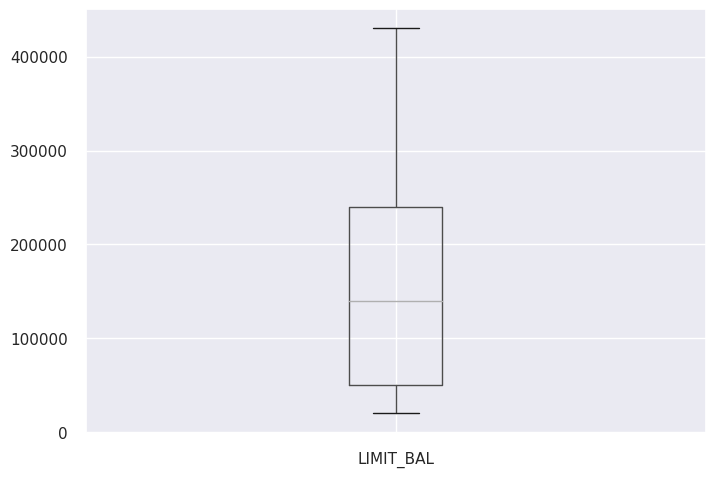

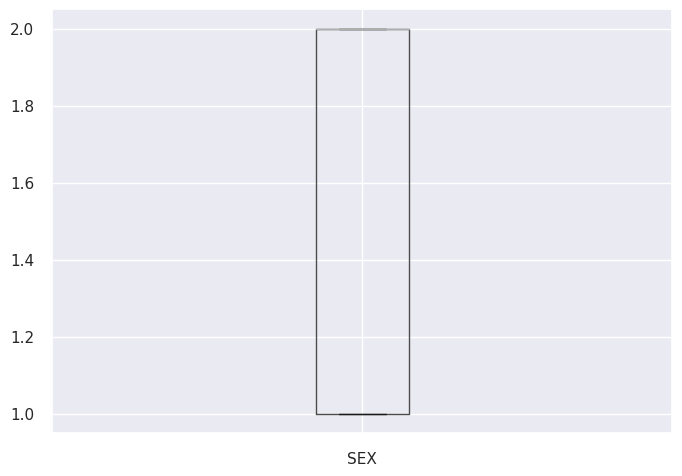

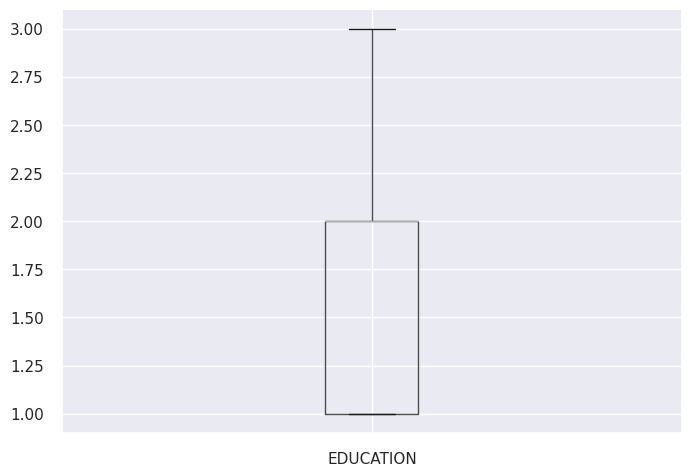

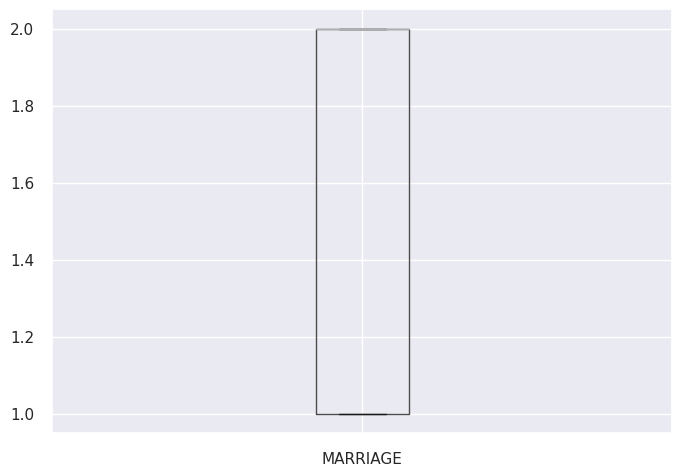

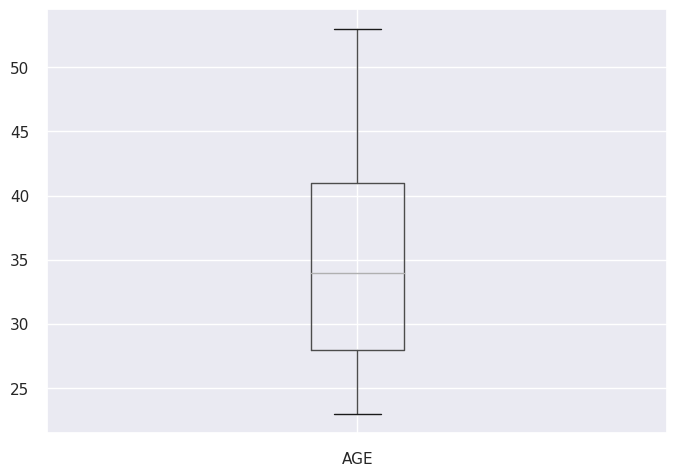

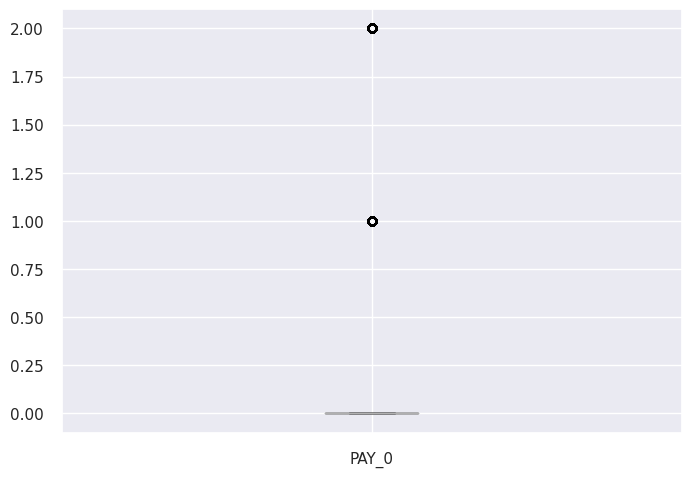

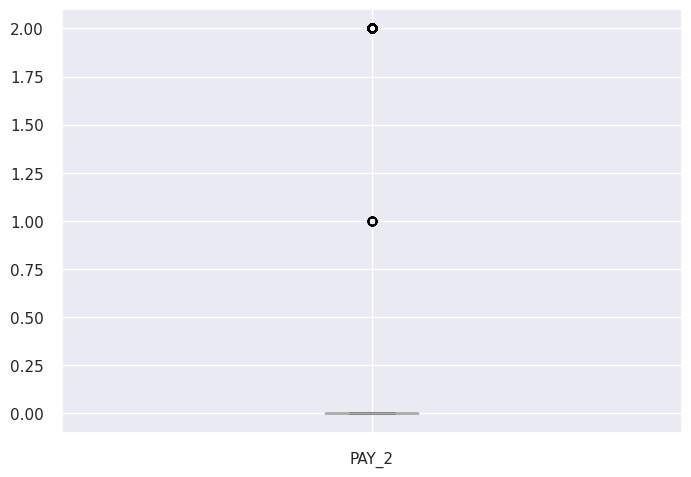

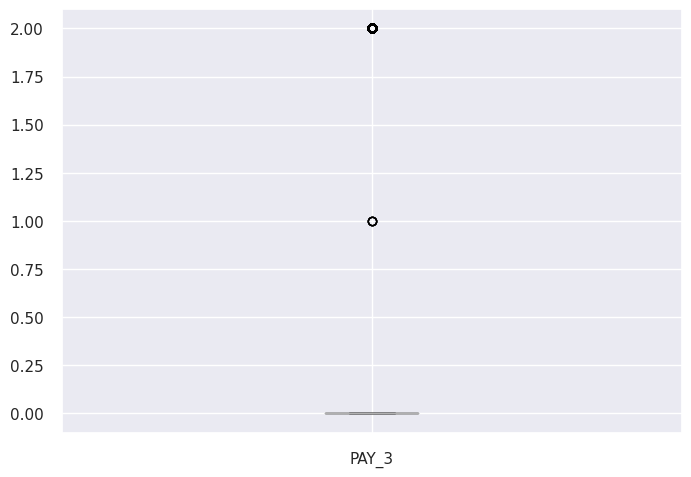

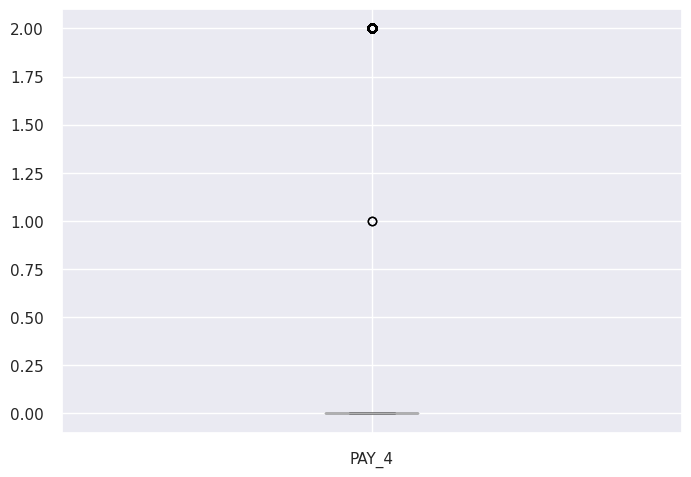

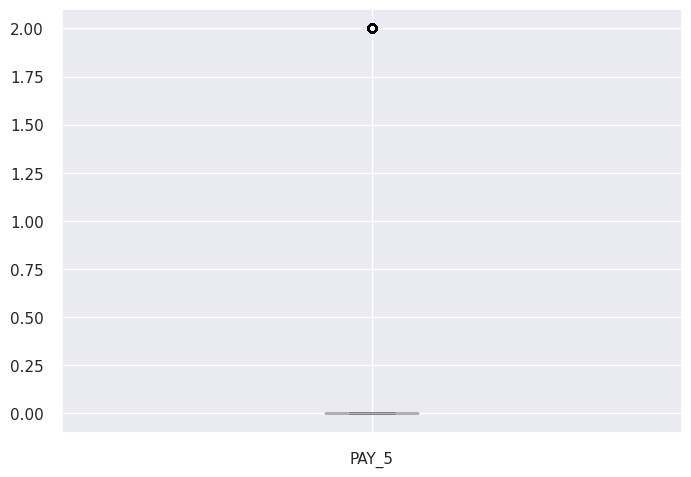

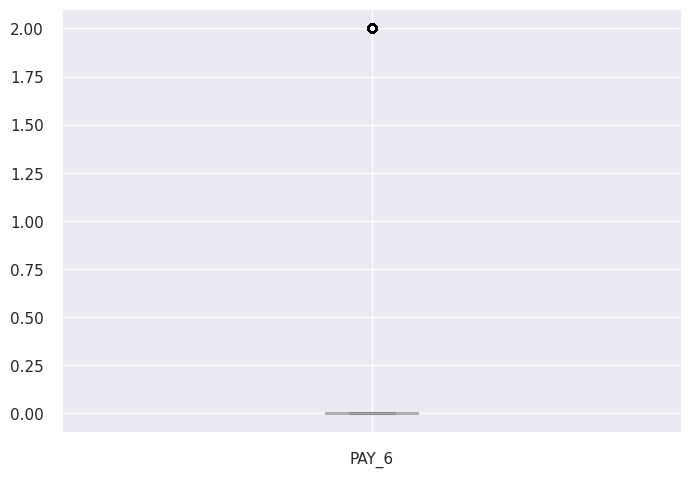

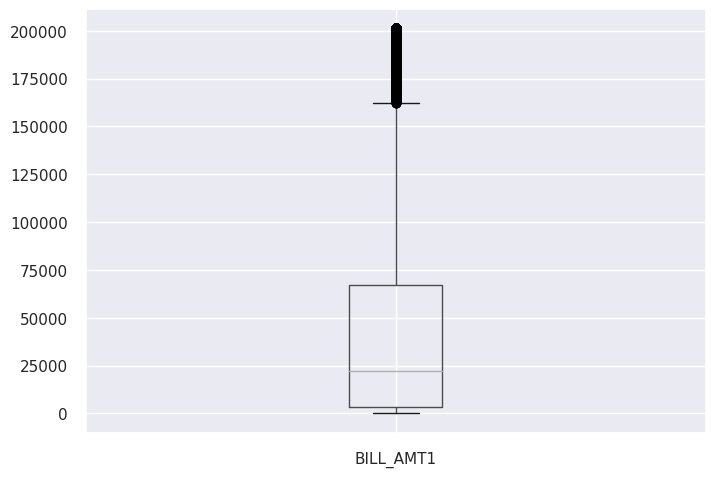

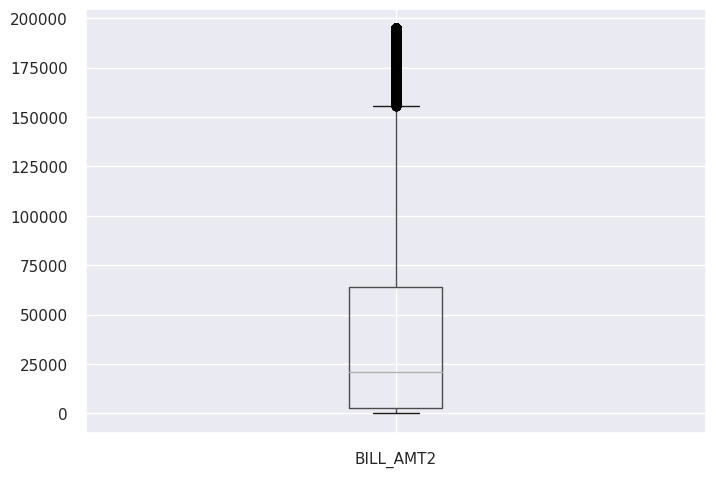

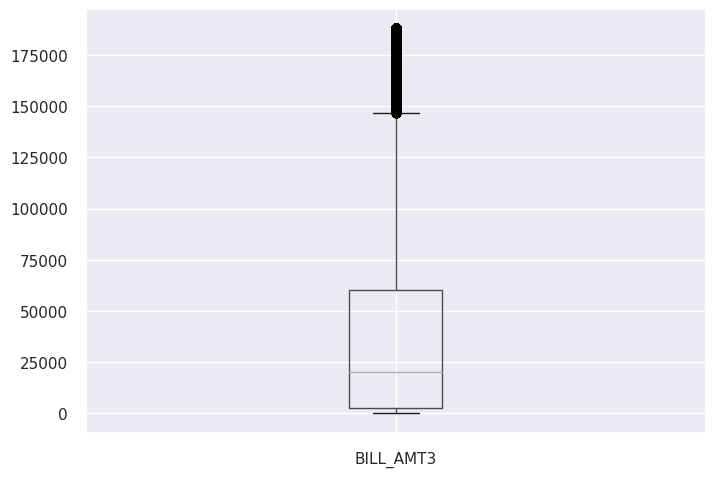

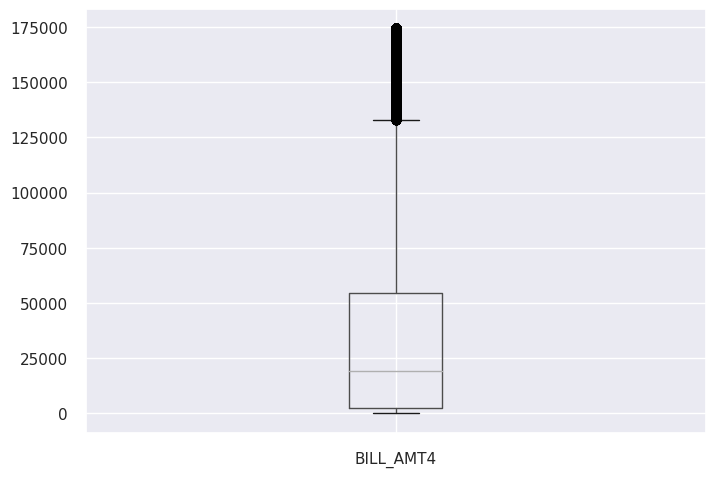

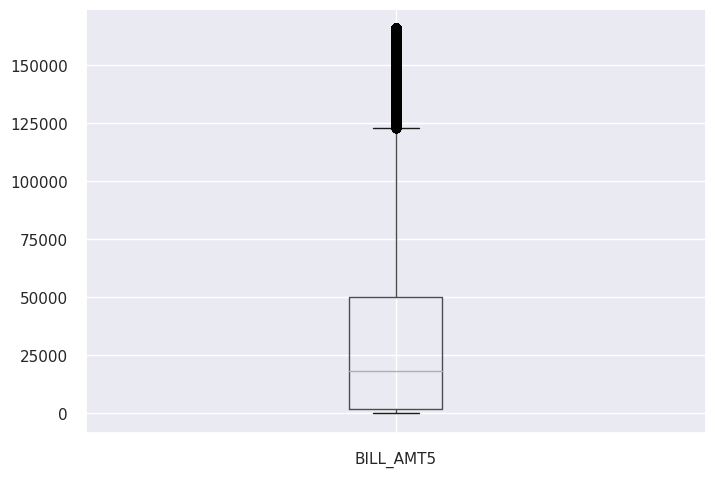

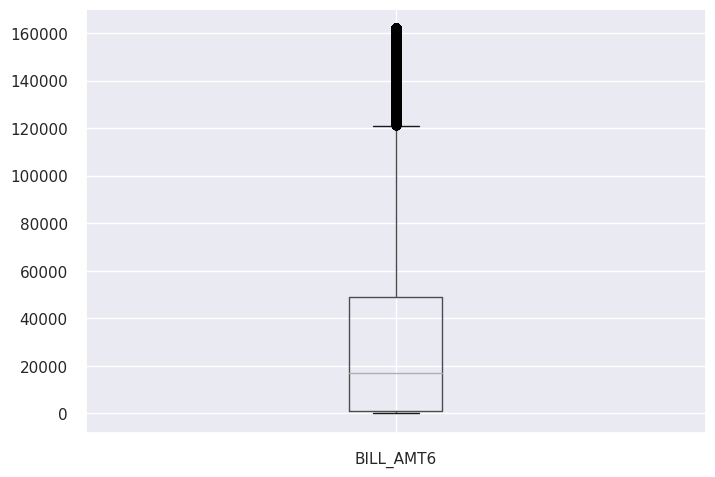

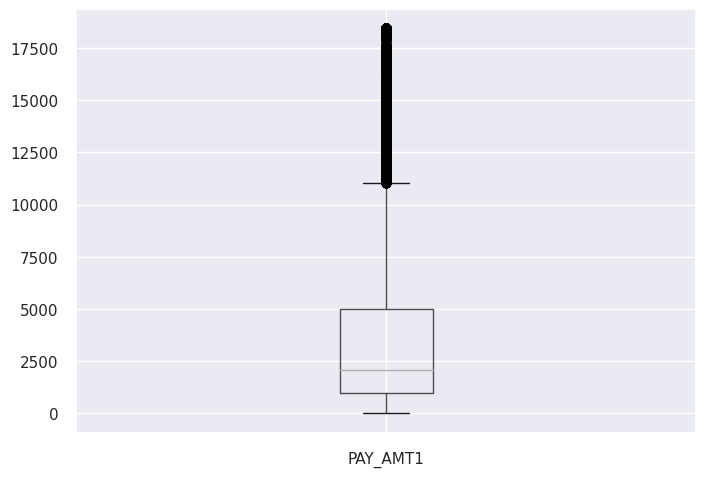

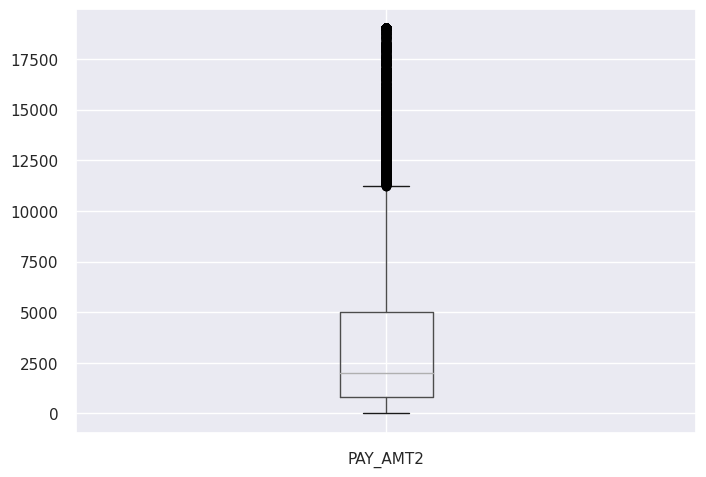

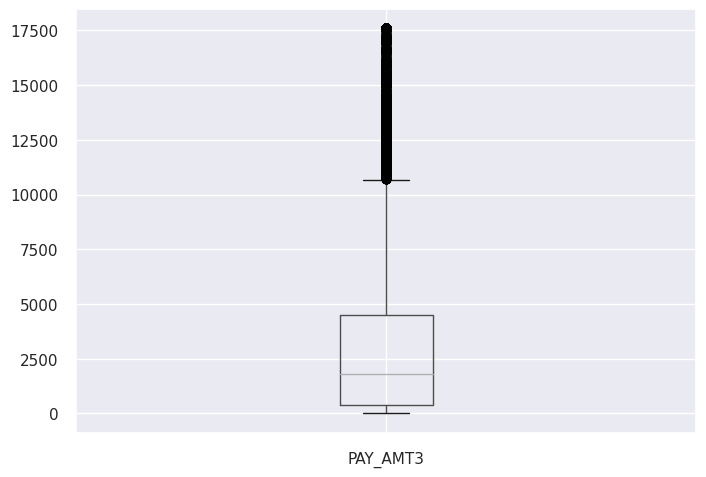

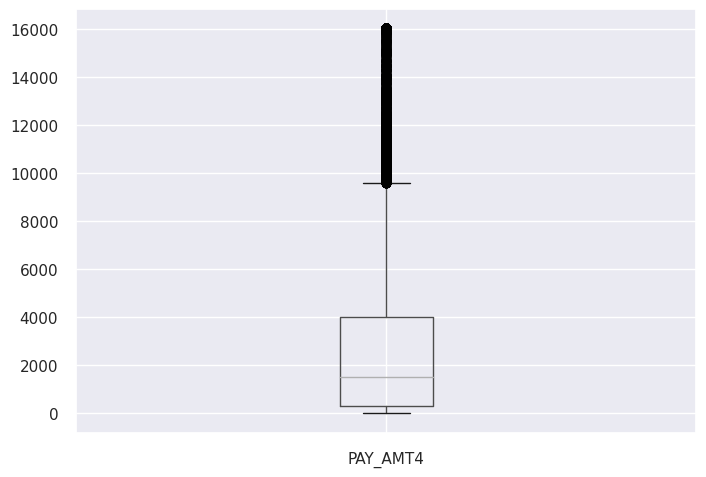

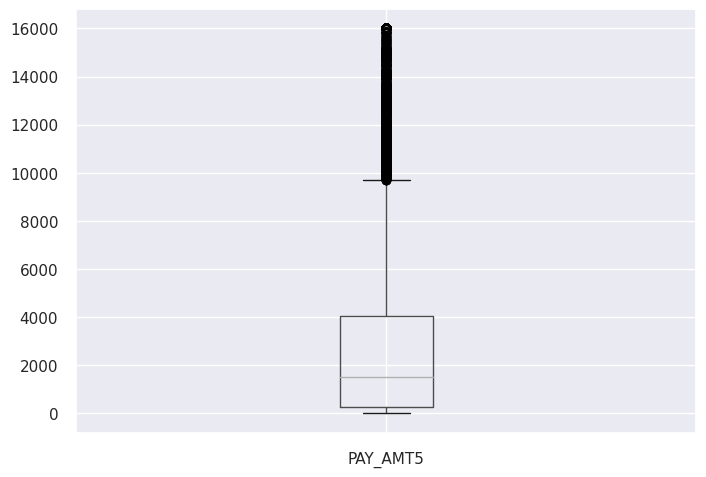

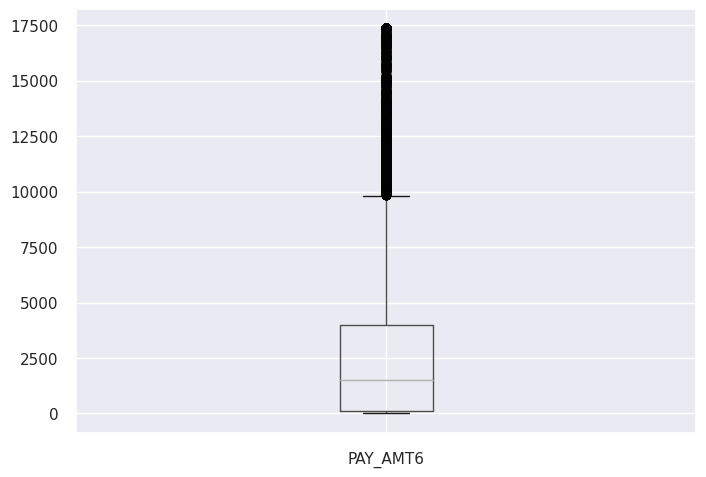

In [61]:
# Mediante Boxplot se visualizan las distribuciones para así ver los atípicos que ya noexisten y los que  aún permanecen
num
for column in num:
    plt.figure()
    credit_card_default_no_outliers.boxplot([column])

Existe una mejoría después de la limpieza de atípicos

##12. Data Story Telling


Le breve exploración mostarda mas abajo indica que alrededor de un 22% de los clientes tarjeta habientes poseen un comportamiento de no pago, un proporción no menor que le produce al banco perdidas que podrían disminuirse al bajar dicha proporción al mínimo posible.
Ya se han realizado algoritmos predictivos que pueden ayudar a la hora de seleccionar a los clientes que lo más probablemente (En rango de confiabilidad) no pagarán. Sin embargo para disminuir los gastos relacionados con el análisis la factibilidad de que a nuevos aplicantes se les otrogue una tarjeta de crédito, buena idea sería centrarse en una población más selectiva, la cual se puede determinar gracias a una previa exploración, que permita identificar ciertas características demográficas como la edad, nivel educativo, etc, así como también otras variables relacionadas con el comportamiento de pago del cliente, y en función de todo ese análisis detectar que segmento de esa población que más probablemente pagaría sus créditos.


Algunas preguntas que nos haríamos serían:
1. A la primera impresión se podría pensar que un trabajador en su etapa más productiva por lo general posee un trabajo más estable que le permitiría absrver un mayor endeudamiento comparado con otros que quizas no cuentan con un buen empleo, en ese sentido ¿la edad puede ser un factor o una variable que influya en la variable destino ("default payment next month") ?
2. Si un trabajador posee un buen empleo en función de los estudios realizados ¿Sería posible que al poseer un mayor nivel de estudio aumente la probabilidad que el cliente pague y no quede en mora?
3. Aunque a primera impresión no parezca evidente¿Es el género importante a la hora de tener solvencia para pagar el crédito?
4. ¿El tener un buen comportamiento de pago y no poseer atrasos infuye sobre la variable destino?

Realizando algunas exploraciones nos permite conocer la proporción de clientes morosos, de acuerdo a la tabla que registra el movimiento de clientes desde mayo a octubre de 2005

In [62]:
credit_card_default_label = credit_card_default.copy()
credit_card_default_label = credit_card_default.replace(
    {
        'MARRIAGE': {
            1: "Casado",
            2: "Soltero"
        },
        'EDUCATION': {
            1: "Postgrado",
            2: "Universidad",
            3: "Secundaria"
            },

        'SEX': {
            1: "Masculino",
            2: "Feminino"
            },

        'PAY_0': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },
        'PAY_2': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },
        'PAY_3': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },
        'PAY_4': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },
        'PAY_5': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },
        'PAY_6': {
            0: "Al día",
            1: "1 mes",
            2: "2 meses"
            },

        'default payment next month': {
            0: "Pagó",
            1: "Moroso"
        }
})



In [64]:
# Se calcula número de clientes morosos y no morosos
credit_card_default_label.columns
grupo_no_pago = credit_card_default_label['default payment next month'].value_counts()
grupo_no_pago

Pagó      23364
Moroso     6636
Name: default payment next month, dtype: int64

In [65]:
# cálculo de proporción de clientes no pago
porcent_no_pago = grupo_no_pago[1]/(grupo_no_pago[0] + grupo_no_pago[1]) * 100
porcent_no_pago


22.12

Al rededor de un 22% de los clientes son morosos

Las siguientes manipulaciones y exploraciones permiten analizar y visualizar la relación entre el nivel educativo, edad, estado civil, género y la variable destino

In [66]:
# Filtros para separar tablas de morosos y no morosos
fltr_pago = credit_card_default_label['default payment next month'] == "Pagó"
fltr_no_pago = credit_card_default_label['default payment next month'] == "Moroso"

In [67]:
#Se obtienen los 2 DataFrames
credit_crd_dft_pago = credit_card_default_label.loc[fltr_pago,]
credit_crd_dft_no_pago = credit_card_default_label.loc[fltr_no_pago,]

Primero se da la visual de la proporción de los morosos y no morosos


[Text(0.5, 1.0, 'Comparación Clientes que Pagan Vs Clientes Morosos')]

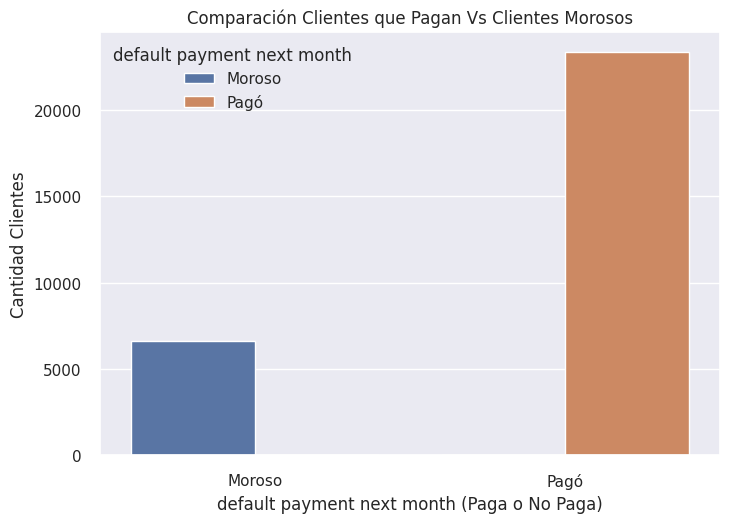

In [68]:
#Gráfico de barras para comparar clientes moros vs no morosos
plt.figure()
ax = sns.countplot(data=credit_card_default_label, x='default payment next month', hue='default payment next month' )
ax.set(xlabel="default payment next month (Paga o No Paga)")
ax.set(ylabel="Cantidad Clientes")
ax.set(title="Comparación Clientes que Pagan Vs Clientes Morosos")
#ax.legend(labels=["Paga", "Moroso"])


Se observa que un poco más de 6 mil clientes son morosos, es decir alrededor del 22% como lo confirma el cálculo anterior

A continuación las visuales para las demas variables, en el eje de las abscisas el "0" corresponde a los clientes que pagaron y el "1" a los morosos

[Text(0, 0.5, 'Cantidad Clientes Vs Género')]

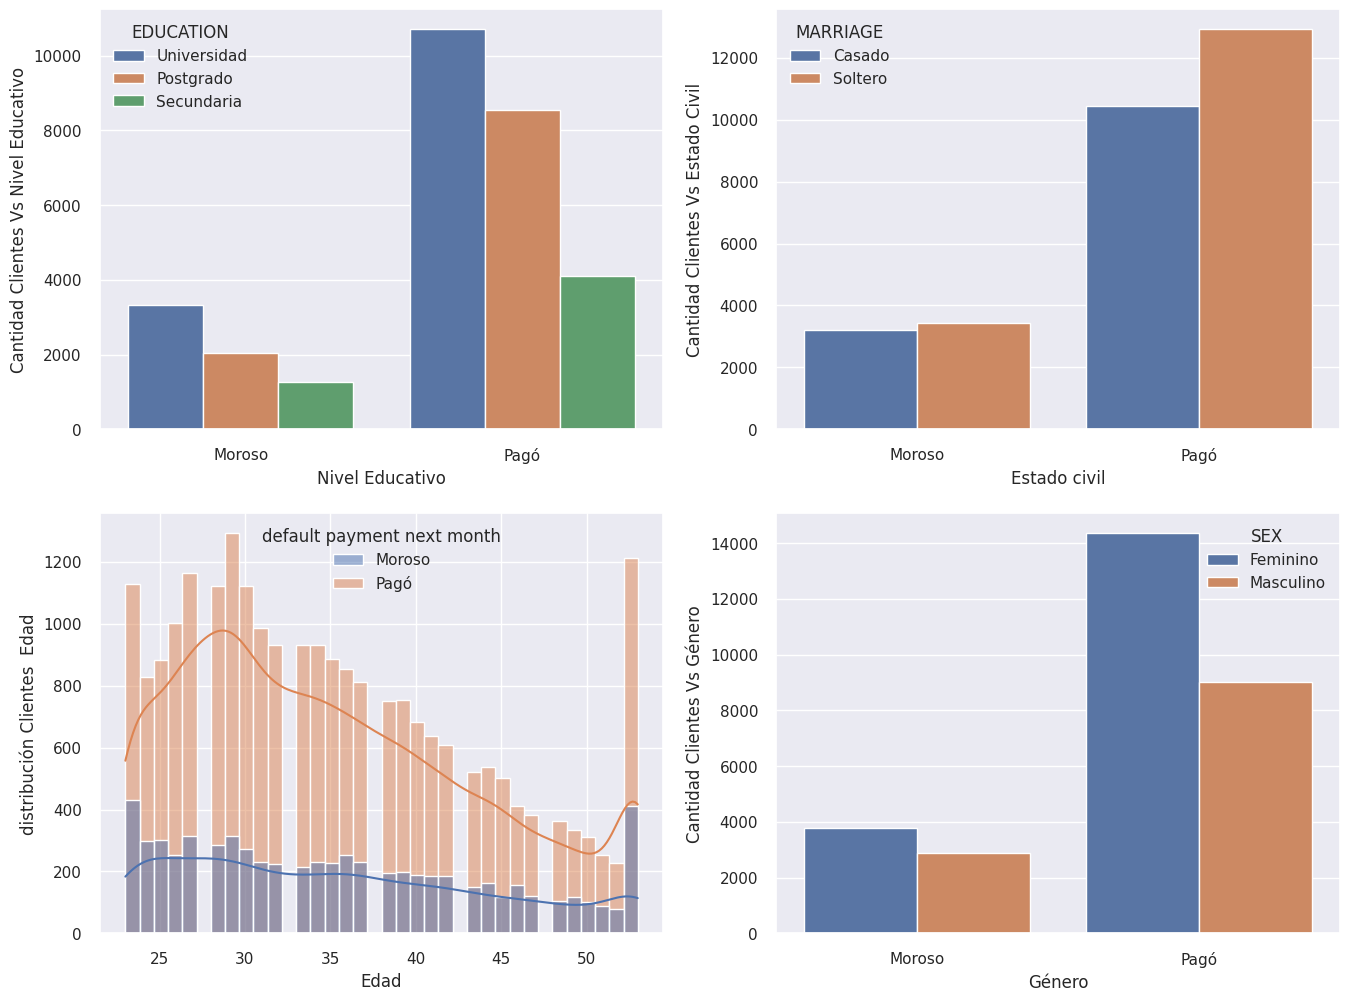

In [142]:

#Se obtienen los marcos y ejes para los distintos gráficos utilizando seaborn
f, axs = plt.subplots(2,2, figsize=(16,12))
ax1 = sns.countplot(data=credit_card_default_label, hue = 'EDUCATION', x='default payment next month', ax = axs[0,0])
ax1.set(xlabel="Nivel Educativo")
ax1.set(ylabel="Cantidad Clientes Vs Nivel Educativo")
#ax1.legend(labels=['Postgrado', 'Universidad', 'Scundaria', 'Otro'])

ax2 = sns.countplot(data=credit_card_default_label, hue = 'MARRIAGE', x='default payment next month', ax = axs[0,1])
ax2.set(xlabel="Estado civil")
ax2.set(ylabel="Cantidad Clientes Vs Estado Civil")
#ax2.legend(labels=['Casado', 'Soltero', 'Otro'])

ax3 = sns.histplot(data=credit_card_default_label, x = 'AGE', hue='default payment next month', kde=True, ax = axs[1,0])
ax3.set(xlabel="Edad")
ax3.set(ylabel="distribución Clientes  Edad")
#ax3.legend(labels=['No Paga', 'Paga'])


ax4 = sns.countplot(data=credit_card_default_label, hue = 'SEX', x='default payment next month', ax = axs[1,1])
ax4.set(xlabel="Género")
ax4.set(ylabel="Cantidad Clientes Vs Género")
#ax4.legend(labels=['Masculino', 'Femenino', 'Otro'])

####El análisis en los 4 recuadros anteriores es como sigue:
1. Primer recuadro(arriba a la izquierda): Es la visual de los niveles educativos, la cual denota que la mayor parte de los clientes poseen una formación profesional universitaria, y aunque dentro de los morosos también existen universitarios, lo importante es notar las proporciones, es decir en este caso aquellos con estudios de Postgrados y Universitarios que pagaron con respecto a aquellos etiquetados como morosos y poseen una formación profesional igualmente es mucho mayor, a si hacemos la misma comparación con aquellos que solo poseen estudios secundarios.

2. Segundo recuadro (arriba y a la derecha): Es la visual sobre el estado civil de los clientes. Los solteros poseen una mayor proporcion de los solteros que pagaron respecto a los morosos. Esto hace pensar que los solteros tienden a tener mas solvencia a la hora de cumplir con sus obligaciones crediticias.
3. Tercer recuadro (abajo y a la izquierda): Es la visual de la distribución de los clientes por edad, no pareciera que la Edad fuese una buena variable predictiva.
4. Cuarto cuadrante (abajo y a la derecha): Visual de los clientes por género. Se observa que existe mucha participación de mujeres en el uso de créditos

####A continuación se realizan manipulaciones para obtener DataFrames que permitan analizar el comportamiento de pago de los clientes, es decir para poder analizar que relación existe entre las variables de atrasos de pago y la variable destino

In [143]:
#DataFrame para los clientes morosos
credit_crd_no_pago_status = pd.melt(credit_crd_dft_no_pago, id_vars='ID',
                        value_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
                        ignore_index=True)

credit_crd_no_pago_status.rename(columns={'variable':'Estado_pago'}, inplace=True)

#DataFrame para los clientes que pagaron
credit_crd_pago_status = pd.melt(credit_crd_dft_pago, id_vars='ID',
                        value_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
                        ignore_index=True)

credit_crd_pago_status.rename(columns={'variable':'Estado_pago'}, inplace=True)
credit_crd_no_pago_status

ID Estado_pago    value
0          1       PAY_0  2 meses
1          2       PAY_0   Al día
2         14       PAY_0    1 mes
3         17       PAY_0   Al día
4         22       PAY_0   Al día
...      ...         ...      ...
39811  29992       PAY_6  2 meses
39812  29995       PAY_6  2 meses
39813  29998       PAY_6   Al día
39814  29999       PAY_6   Al día
39815  30000       PAY_6   Al día

[39816 rows x 3 columns]

In [144]:
#Distribución de número de clientes por número de meses de atraso de pago
credit_crd_no_pago_status["value"].value_counts()

Al día     26570
2 meses    11987
1 mes       1259
Name: value, dtype: int64

Los atrasos más importantes se extienden hasta 2 meses

####A continuación las visuales para el comportamiento de los clientes en los atrasos de pago, las columnas que representan los atrasos en cada mes de pago(Mayo a Octubre) se identifican por un color en la leyenda. En el eje de las abscisas se despliegan los meses de atrasos.

[Text(0.5, 1.0, 'Comportamiento de pago de Clientes durentes 6 meses(Cliente Paga)')]

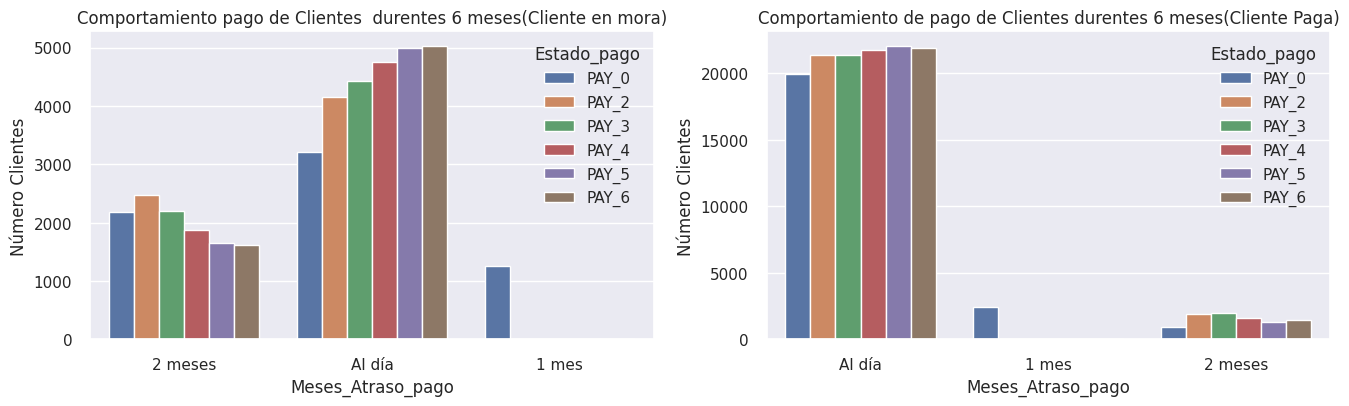

In [145]:
#Se obtienen los gráficos mediante seaborn
f, axs = plt.subplots(1,2, figsize=(16,4))
ax5 = sns.countplot(data=credit_crd_no_pago_status, x='value', hue='Estado_pago', ax=axs[0])
ax5.set(xlabel="Meses_Atraso_pago")
ax5.set(ylabel="Número Clientes")
ax5.set(title="Comportamiento pago de Clientes  durentes 6 meses(Cliente en mora)")

ax5 = sns.countplot(data=credit_crd_pago_status, x='value', hue='Estado_pago', ax=axs[1])
ax5.set(xlabel="Meses_Atraso_pago")
ax5.set(ylabel="Número Clientes")
ax5.set(title="Comportamiento de pago de Clientes durentes 6 meses(Cliente Paga)")



De las gráficas se desprende que existe una proporción importantes de clientes con atrasos de al menos 2 meses y que están en el segmento de los morosos

###Conclusión

Tal como se muestra en las visuales, los factores demográficos y comportamientos de pago de los clientes tienen un efecto no menor sobre la variable destino, es decir para determinar si un  tarjeta habiente va a pagar o va a quedar moroso.

Por tanto como una forma de intentar reducir el número de morosos, se podría centrar las campañas hacia un segmento de población que se encuentre en un rango de edades más produtivas, entre 22 y 40 años y que posean una formación universitaria, y de preferencia hacia la población soltera. Esto es buscando un segmento que posea más solvencia al cumplir con sus obligaciones crediticias.

##13.Continuación de Data Story Telling


Continuando con la identificación de "Insights", se realizan otras manipulaciones Pandas y Visualizaciones Seaborn, centrándose en las variables ya analizadas, para complementar la información de las posibles correlaciones entre variables predictoras y la objetivo(default payment next month). Para ello se realizan análisis del tipo Bivariado.

A continuación se realizan manipulaciones Panadas para obtener gráficos tipo Box Plot.

<Axes: xlabel='EDUCATION', ylabel='BILL_AMT1'>

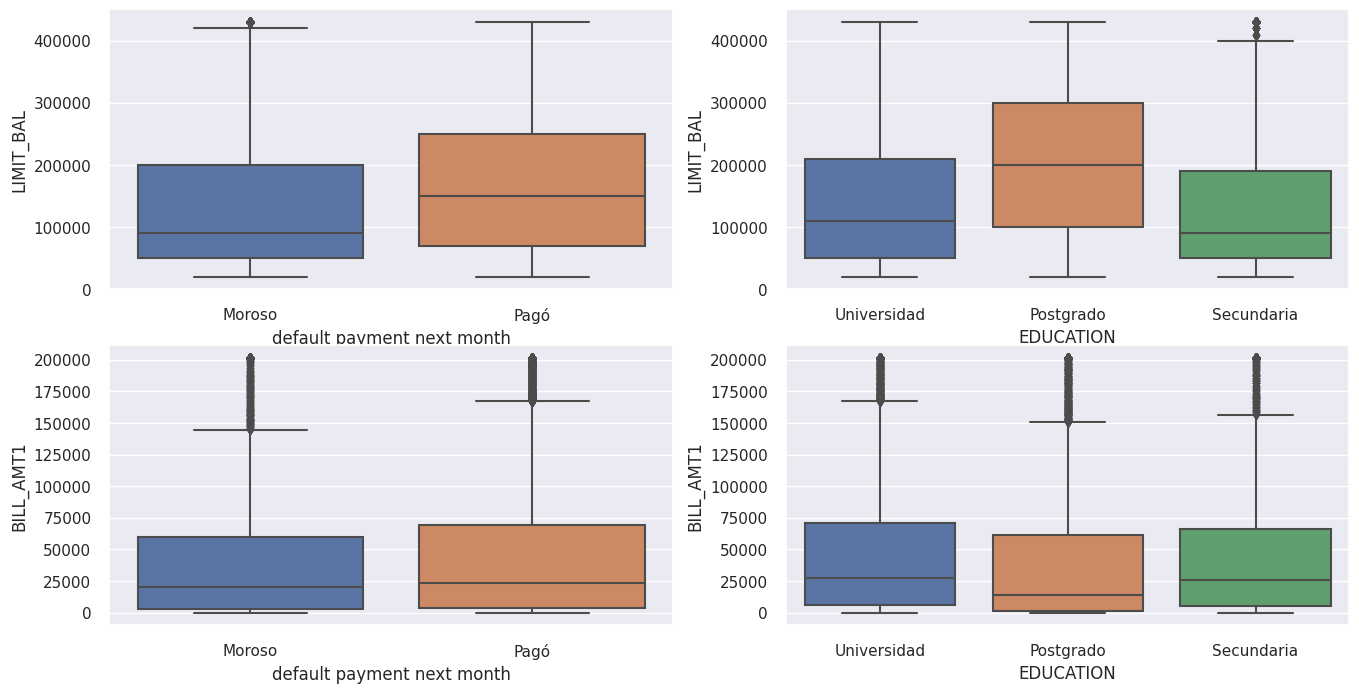

In [146]:
#Gráficos Box Plot para análisis Bivariados sobre las variables: EDUCATION, MARRIAGE, LIMIT_BAL, BILL_AMT1, default payment next month
plt.figure(figsize=[16, 8])
plt.subplot(2,2,1)
sns.boxplot(data=credit_card_default_label, y='LIMIT_BAL', x=credit_card_default_label['default payment next month'])
plt.subplot(2,2,2)
sns.boxplot(data=credit_card_default_label, y='LIMIT_BAL', x=credit_card_default_label['EDUCATION'])
plt.subplot(2,2,3)
sns.boxplot(data=credit_card_default_label, y='BILL_AMT1', x=credit_card_default_label['default payment next month'])
plt.subplot(2,2,4)
sns.boxplot(data=credit_card_default_label, y='BILL_AMT1', x=credit_card_default_label['EDUCATION'])

####De acuerdo a los gráficos se observa:
####1. En el gráfico ubicado arriba e izquierda Los Clientes morosos corresponden a aquellos que poseen en promedio un crédito inicial(LIMIT_BAL) promedio menor en comparación a aquellos qie si pagaron.
####2.  En el gráfico ubicado arriba y derech a Los Clientes que poseen escolaridad secundaria pertenecen al grupo que obtuvieron un menor crédito inicial(LIMIT_BAL)
####3.  En el gráfico ubicado abajo e izquierda no pareciera que la variable de Estado de Cuenta del mes de octubre(BILL_AMT1) sea una buena variable predictora, lo cual se repite para el caso de las otras variables del dataset(BILL_AMT2 a BILL_AMT6).
####4.  En el gráfico inferior derecho muestra que los clientes con mayor escolaridad(Postgrado) poseen un menor Estado de cuenta, posiblemente por tener un mejor comportamiento de pago.

### En las siguientes celdas se realizan manipulaciones Pandas para obtener tablas de frecuencia y contingencia((pd.crosstab()), y luego obtener las visuales para las variables de interés.

In [147]:
#Tabla de frecuencia para la variable escolaridad "EDUCATION"
n_educacion_fr = credit_card_default_label['EDUCATION'].value_counts()
print(n_educacion_fr)

Universidad    14030
Postgrado      10585
Secundaria      5385
Name: EDUCATION, dtype: int64


In [148]:
#Resultados de escolaridad en porcentaje (0 - 100%)
#Los clientes que cuentan con nivel de Postgrado representan el 47% del total,
#Universitario: 35% y Secundario: 19%
n_educacion_porc = 100 * n_educacion_fr/ len(credit_card_default_label['EDUCATION'])
print(n_educacion_porc)

Universidad    46.766667
Postgrado      35.283333
Secundaria     17.950000
Name: EDUCATION, dtype: float64


In [149]:
#Tabla de Contingencia
educacion_cross = pd.crosstab(index=credit_card_default_label['default payment next month'],
            columns=credit_card_default_label['EDUCATION'], margins=True)
educacion_cross

EDUCATION                   Postgrado  Secundaria  Universidad    All
default payment next month                                           
Moroso                           2036        1270         3330   6636
Pagó                             8549        4115        10700  23364
All                             10585        5385        14030  30000

In [150]:
#Tabla de Contingencia (0 -100%) en porcentaje relativo según la variable destino
educacion_cross_porc = pd.crosstab(index=credit_card_default_label['default payment next month'],
            columns=credit_card_default_label['EDUCATION']).apply(lambda r: r/r.sum() *100, axis=1)


educacion_cross_porc

EDUCATION                   Postgrado  Secundaria  Universidad
default payment next month                                    
Moroso                      30.681133   19.138035    50.180832
Pagó                        36.590481   17.612566    45.796953

In [151]:
#Tabla de Contingencia para la variable Estado Civil("MARRIAGE) en porcentaje relativo según la variable destino
est_civil_cross = pd.crosstab(index=credit_card_default_label["default payment next month"],
                        columns=credit_card_default_label["MARRIAGE"]).apply(lambda r: r/r.sum() * 100,
                                axis=1)
est_civil_cross

MARRIAGE                       Casado    Soltero
default payment next month                      
Moroso                      48.312236  51.687764
Pagó                        44.739771  55.260229

In [152]:
#Tabla de contingencia para estado de pago mes Octubre (PAY_0) en porcentaje relativo según la variable destino
pay0_cross =  pd.crosstab(index=credit_card_default_label["default payment next month"],
                        columns=credit_card_default_label["PAY_0"]).apply(lambda r: r/r.sum() *100,
                                axis=1)
pay0_cross

PAY_0                           1 mes    2 meses     Al día
default payment next month                                 
Moroso                      18.866787  32.805907  48.327306
Pagó                        10.426297   4.078925  85.494778

###Se despliegan las visuales para las tablas obtenidas

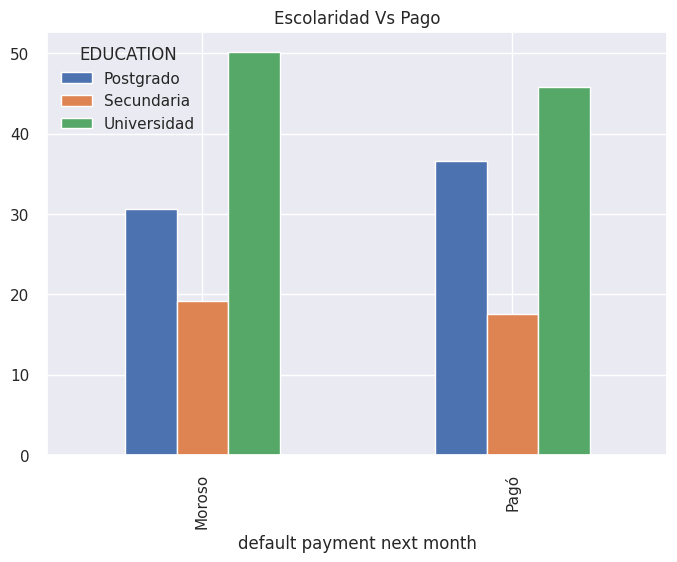

In [158]:
#Visual para el nivel educativo o escolaridad
plot = pd.crosstab(index=credit_card_default_label['default payment next month'],
            columns=credit_card_default_label['EDUCATION']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind="bar", title="Escolaridad Vs Pago")

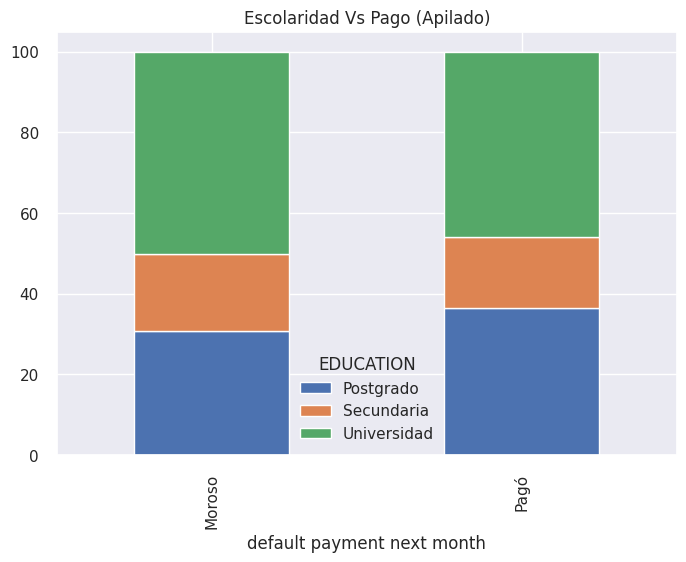

In [159]:
#Similar a la Visual anterior pero con las barras apiladas
plot = pd.crosstab(index=credit_card_default_label['default payment next month'],
            columns=credit_card_default_label['EDUCATION']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind="bar", stacked=True, title="Escolaridad Vs Pago (Apilado)")

###Las gráficas muestran que los clientes con escolaridad universitaria representan un porcentaje mayor que las otras escolaridades para el grupo de los morosos y también del grupo de quienes si pagaron, sin embargo esa proporción es mayor en el grupo de los morosos(50% aprox)

<Axes: title={'center': 'Atraso de Pago Vs Morosidad'}, xlabel='default payment next month'>

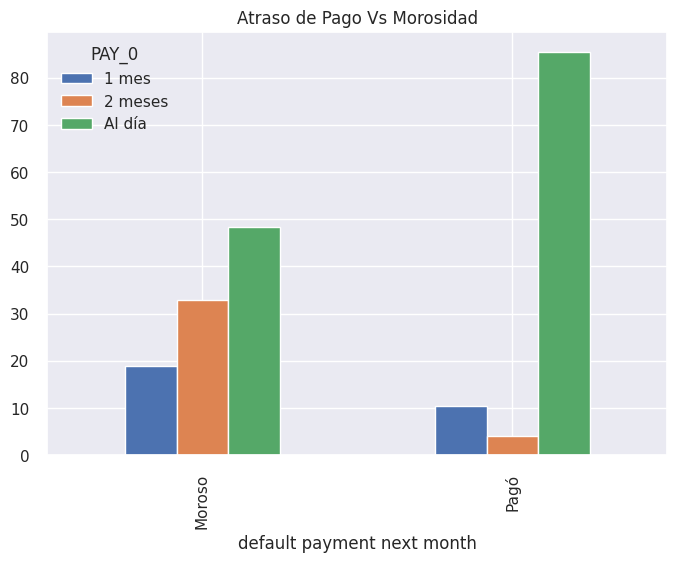

In [162]:
#Visual para la variable de comportamiento de pago del més de mayo(PAY_6) que muestra los pagos atrasados en meses (0= sin atraso, 2 = 2 meses de atraso)
pd.crosstab(index=credit_card_default_label["default payment next month"],
                        columns=credit_card_default_label["PAY_0"]).apply(lambda r: r/r.sum() *100, axis=1).plot(kind="bar", title="Atraso de Pago Vs Morosidad")

<Axes: title={'center': 'Atraso de pago Vs Morosidad(Apilado)'}, xlabel='default payment next month'>

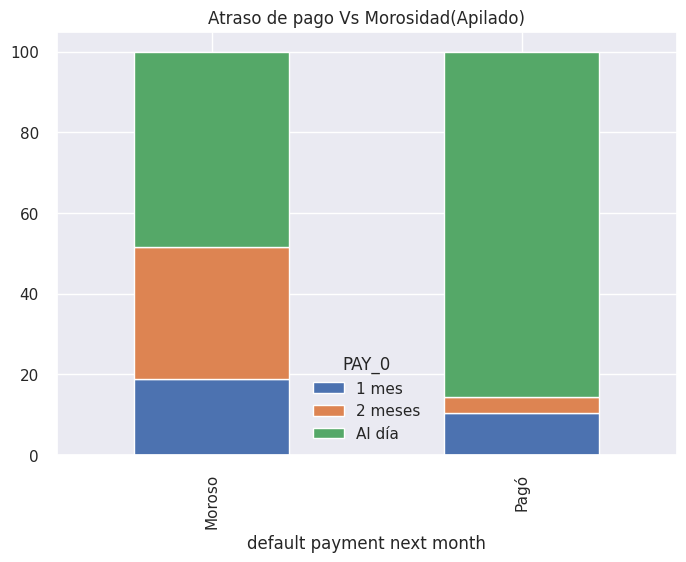

In [161]:
#Misma visual anterior con barras apiladas
pd.crosstab(index=credit_card_default_label["default payment next month"],
                        columns=credit_card_default_label["PAY_0"]).apply(lambda r: r/r.sum() *100, axis=1).plot(kind="bar", stacked=True, title="Atraso de pago Vs Morosidad(Apilado)")

Los clientes sin atraso en el pago en el mes anterior representan mayor porcentaje en el grupo de los qe si pagaron(85%) que aquellos sin atraso en el grupo de los morosos(alrededor del 48%). Los clientes con 2 meses de atraso aumentan en proporción del grupo de los morosos respecto a los que pagaron(32% vs. 4%), lo que evidencia que aquellos con menos escolaridad  demuestran menor intención de pagar

In [70]:
#Data Profiling
#profile = pandas_profiling.ProfileReport(credit_card_default)
#profile